<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# 1. Model building

## Prognostic validation (Discriminative and calibrative)

### Discriminative
#### Harrell's Concordance
##### Fig. 1 At 5 years, Model selection of (all features - CPH, RSF, NCOX) along with ranking across folds
##### Fig. 2 At 5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens) along with ranking across folds
##### Fig. 3 At 1:5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens)

#### Uno's Concordance
##### Fig. 5 At 5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens) along with ranking across folds
##### Fig. 6 At 1:5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens)

### Calibrative
#### Integrated Brier Score (IBS)
##### Fig. 7 At 5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens) along with ranking across folds

#### Negative Binomial log-likelihood (NBLL)
##### Fig. 8 At 5 years, (ISS, R-ISS, R2-ISS, NCOX with top gens) along with ranking across folds

## Feature selection to choose top gens (our hybrid approach)
### Fig. 9 (5 states all features ranked)
### Fig. 10 aggregate feature importance
### Fig. 11 (heatmap + lineplot ) Hybrid approach

## Impact of Feature group addition on Harrell's C (does order matter to impact of feature group to concordance)
### Fig. 12 order along with ranking across folds
#### Fig. 13 relative increase (%) of c-index normalized for the number of features of the group
### Fig. 14 reverse order along with ranking across folds
#### Fig. 15 relative increase (%) of c-index normalized for the number of features of the group

# 2. LOOCV
## Fig. 17 Risk barplot at 5 years by timepoint (P1/P2)
## Fig. 18 Risk Density by SCT
### Fig. 19 Risk Density by our model chosen features by SCT

# 3. Model validation on external test set
## Fig. 16 Harrell's C At 5 years, (ISS, NCOX with top gens)

# 4. Risk comparisons between CV and HD6 set
## Fig. 20 Risk overlap between CV and LOOCV
## Fig. 21 Risk overlap between CV and HD6
## Fig. 22 Restratify ISS by IRMM (on CV and HD6)

# 5. Treatment variance
## Fig. 23 Treatment variance plots on CV (by SCT, maint, neither, both)
## Fig. 24 TSNE (2/3D)

# 6. Individualized risks (CV/HD6)
## Fig. 25 scatter plot of least to high risk (by SCT)
## Fig. 26 loocv (or mean for HD6) sediment plots of individual patients ranked by risk of remission/pfs
## Fig. 27 For HD6, boxplots with 6 states for each patient

In [2]:
# Load libraries
import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt; import numpy as np; 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator); from IPython.display import Markdown;
from fractions import Fraction; import glob as glob; import scipy
import warnings; import functools as ft; import matplotlib.pylab as pylab

warnings.filterwarnings('ignore')

# cd to base directory in which you see all the folders such as /code /data_in /data_out
base_dir = '/home/axr2376/pred_1_0_paper'

# Git clone from our repository 
# This jupyter notebook is present in /code

In [3]:
## OS
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('brown','1. Model building'))

</font><h1><strong><font color=brown>1. Model building</strong></h1>

In [4]:
## OS
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#f67b51','1.1 Prognostic validation'))

</font><h1><strong><font color=#f67b51>1.1 Prognostic validation</strong></h1>

In [5]:
# CV on 1933 samples
# Groups: ISS, R-ISS, R2-ISS, CPH on all features, RSF on all features, IRMM
group = '0~1~2~9~100'
group_all = '0~1~2~3~4~5~6~7~8~9~10~11~12~13~14~15~16~17~18~19~20~21~22~100'

# os
os_cv = 'os_ext_val_False' 
os_hd = 'os_ext_val_True'

# efs
efs_cv = 'efs_ext_val_False' 
efs_hd = 'efs_ext_val_True'

targ_dir = base_dir + "/data_out/expt_1/plots/"

In [6]:
rename_x_id = {
                    'M-CPH-R (Group=100)': 'M-CPH-R (all features)', 
                    'M-RSF (Group=100)': 'M-RSF (all features)',
                    'M-Neural CNPH (Group=100)': 'IRMM (all features)',
                    'M-CPH-R (Group=0)': 'R-ISS', 'M-CPH-R (Group=1)': 'R2-ISS', 'M-CPH-R (Group=2)': 'ISS',
                    'M-Neural CNPH (Group=9)': 'IRMM (with top genomic features)',
                    'M-CPH-R (Group=10)': 'GEP70'
                   }

rename_x_id_df = pd.DataFrame.from_dict(rename_x_id, orient='index').reset_index().rename(columns={'index': 'old', 0: 'ID'})

In [7]:
def metric_rank_at_5yrs(group_names_, outcome_typ, __dir__, metric_):
    df_5yr = pd.read_csv(targ_dir + outcome_typ + "_1825_group_" + group_all + ".csv")[[metric_, 'X_ID']];
    df_ = pd.merge(df_5yr, rename_x_id_df, left_on='X_ID', right_on='old')
    df_ = df_.dropna(subset=[metric_])
    return df_


In [5]:
c_index_type = 'harrell' ; var_name_c = 'C_index_' + c_index_type

In [6]:
# os
outcome_type = os_cv;

df_os_1yr = pd.read_csv(targ_dir + outcome_type + "_365_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_os_2yr = pd.read_csv(targ_dir + outcome_type + "_730_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_os_3yr = pd.read_csv(targ_dir + outcome_type + "_1095_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_os_4yr = pd.read_csv(targ_dir + outcome_type + "_1460_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_os_5yr = pd.read_csv(targ_dir + outcome_type + "_1825_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];

df_os_1yr['time_yr'] = 1; df_os_2yr['time_yr'] = 2; df_os_3yr['time_yr'] = 3; df_os_4yr['time_yr'] = 4; df_os_5yr['time_yr'] = 5

df_os_cv_time = df_os_1yr.append(df_os_2yr, ignore_index=True).append(df_os_3yr, ignore_index=True).append(df_os_4yr, ignore_index=True).append(df_os_5yr, ignore_index=True)

In [7]:
# efs
outcome_type = efs_cv; 
df_efs_1yr = pd.read_csv(targ_dir + outcome_type + "_365_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_efs_2yr = pd.read_csv(targ_dir + outcome_type + "_730_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_efs_3yr = pd.read_csv(targ_dir + outcome_type + "_1095_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_efs_4yr = pd.read_csv(targ_dir + outcome_type + "_1460_group_" + group + ".csv")[[var_name_c, 'X_ID']];
df_efs_5yr = pd.read_csv(targ_dir + outcome_type + "_1825_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];

df_efs_1yr['time_yr'] = 1; df_efs_2yr['time_yr'] = 2; df_efs_3yr['time_yr'] = 3; df_efs_4yr['time_yr'] = 4; df_efs_5yr['time_yr'] = 5

df_efs_cv_time = df_efs_1yr.append(df_efs_2yr, ignore_index=True).append(df_efs_3yr, ignore_index=True).append(df_efs_4yr, ignore_index=True).append(df_efs_5yr, ignore_index=True)

In [9]:
# rename
df_os_cv_time = pd.merge(df_os_cv_time, rename_x_id_df, left_on='X_ID', right_on='old')
df_os_cv_time = df_os_cv_time.dropna(subset=[var_name_c])

df_efs_cv_time = pd.merge(df_efs_cv_time, rename_x_id_df, left_on='X_ID', right_on='old')
df_efs_cv_time = df_efs_cv_time.dropna(subset=[var_name_c])

In [116]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('purple','1.1.1 Discriminative performance'))

</font><h1><strong><font color=purple>1.1.1 Discriminative performance</strong></h1>

In [ ]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S: Harrell C-index (OS & EFS) based on 5x10 fold stratified cross validation at time t'))

In [100]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

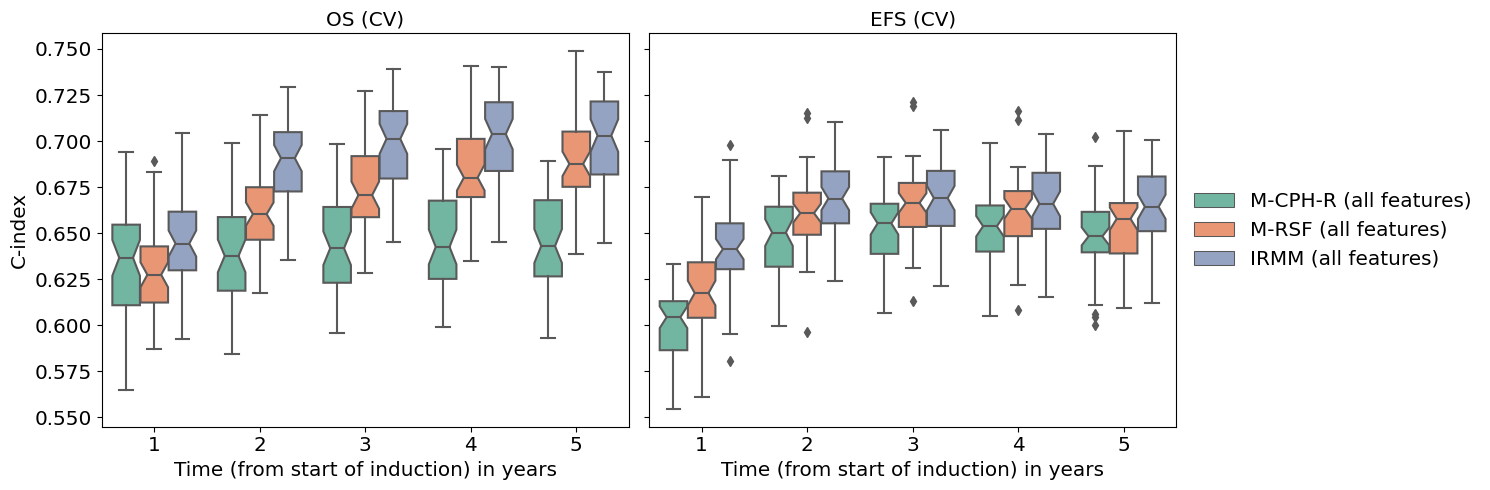

In [101]:
hue_order = ['M-CPH-R (all features)', 'M-RSF (all features)', 'IRMM (all features)']

fig, axs = plt.subplots(1, 2, sharey=True)

ax_os, ax_efs = axs.flatten()

# os (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_os_cv_time, notch=True, hue_order=hue_order, ax=ax_os);
ax_os.set_xlabel('Time (from start of induction) in years') ; ax_os.set_ylabel('C-index') ; ax_os.get_legend().remove()
ax_os.set_title('OS (CV)')

# efs (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_efs_cv_time, notch=True, hue_order=hue_order, ax=ax_efs);
ax_efs.set_xlabel('Time (from start of induction) in years') ; ax_efs.set_ylabel('') ; ax_efs.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax_efs.set_title('EFS (CV)')
plt.tight_layout()

In [14]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1b: Harrell C-index (OS & EFS) with IRMM (top genomic features)'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1b: Harrell C-index (OS & EFS) with IRMM (top genomic features)</strong></h1>

In [105]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

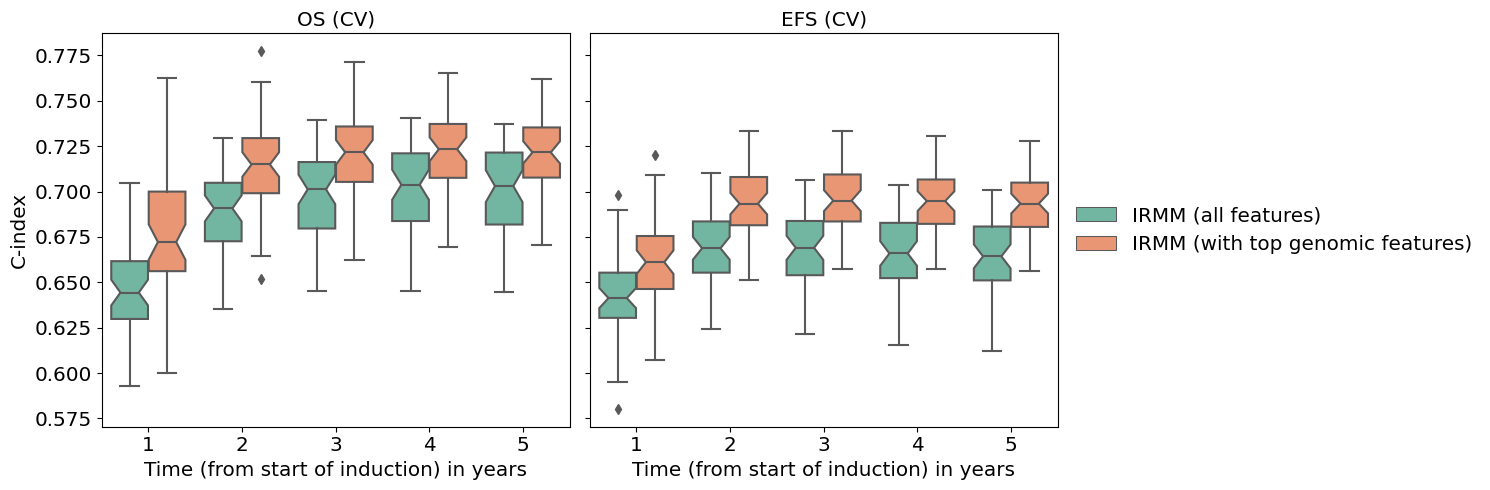

In [106]:
hue_order = ['IRMM (all features)', 'IRMM (with top genomic features)']

fig, axs = plt.subplots(1, 2, sharey=True)

ax_os, ax_efs = axs.flatten()

# os (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_os_cv_time, notch=True, hue_order=hue_order, ax=ax_os);
ax_os.set_xlabel('Time (from start of induction) in years') ; ax_os.set_ylabel('C-index') ; ax_os.get_legend().remove()
ax_os.set_title('OS (CV)')

# efs (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_efs_cv_time, notch=True, hue_order=hue_order, ax=ax_efs);
ax_efs.set_xlabel('Time (from start of induction) in years') ; ax_efs.set_ylabel('') ; ax_efs.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax_efs.set_title('EFS (CV)')
plt.tight_layout()

In [17]:

Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1c: Harrell C-index (OS & EFS) with ranking across 50-fold CV'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1c: Harrell C-index (OS & EFS) with ranking across 50-fold CV</strong></h1>

In [18]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

In [19]:
# plot at 5 years
# Harrell/Uno c-index with ranking across folds 
# 1. (ISS, R-ISS, R2-ISS, IRMM)
# 2. (ISS, ISS+Clinical, ...) and reversed order

# Integrated Brier score
# ...


In [20]:
def read_metrics_(outcome_typ, metr_):
    group_all = '0~1~2~3~4~5~6~7~8~9~10~11~12~13~14~15~100'
    df_5yr = pd.read_csv(targ_dir + outcome_typ + "_1825_group_" + group_all + ".csv")[[metr_, 'X_ID']];
    df_ = pd.merge(df_5yr, rename_x_id_df, left_on='X_ID', right_on='old')
    df_ = df_.dropna(subset=[metr_])
    return df_

# Uno's concordance
df_unoc_os = read_metrics_(os_cv, 'C_index_uno')
df_unoc_efs = read_metrics_(efs_cv, 'C_index_uno')

# Integrated Brier score
df_brier_os = read_metrics_(os_cv, 'Int_Brier_Score')
df_brier_efs = read_metrics_(efs_cv, 'Int_Brier_Score')

# NBLL
df_nbll_os = read_metrics_(os_cv, 'NBLL')
df_nbll_efs = read_metrics_(efs_cv, 'NBLL')

In [21]:
def plot_metric(metr_, df_metric_os, df_metric_efs, y_tex):
    _order = ['ISS', 'R-ISS', 'R2-ISS', 'IRMM (with top genomic features)']

    fig, axs = plt.subplots(1, 2, sharey=True)

    ax_os, ax_efs = axs.flatten()

    # os (cv)
    sns.boxplot(x='ID', y=metr_, palette='Set2', data=df_metric_os, notch=True, order=_order, ax=ax_os, showfliers=False);
    ax_os.set_xlabel('') ; ax_os.set_ylabel(y_tex) ;
    ax_os.set_xticklabels(_order, rotation = 45)
    ax_os.set_title('OS (CV)')

    # efs (cv)
    sns.boxplot(x='ID', y=metr_, palette='Set2', data=df_metric_efs, notch=True, order=_order, ax=ax_efs, showfliers=False);
    ax_efs.set_xlabel('') ; ax_efs.set_ylabel('') ; ax_efs.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    ax_efs.set_title('EFS (CV)')
    ax_efs.set_xticklabels(_order, rotation = 45)

    plt.tight_layout()

In [22]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1. : Concordance based on censored distribution (Uno)'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1. : Concordance based on censored distribution (Uno)</strong></h1>

No handles with labels found to put in legend.


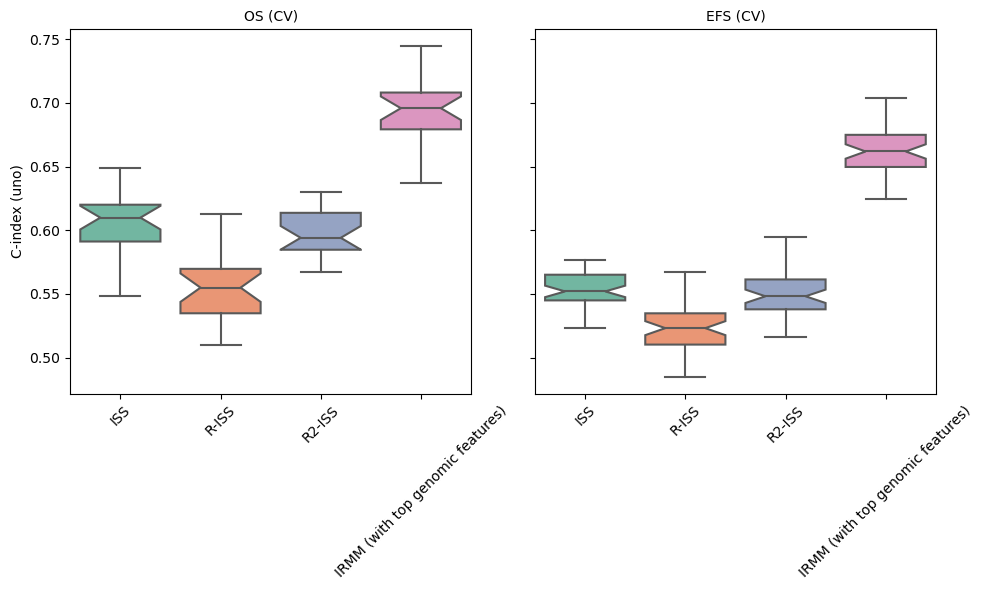

In [23]:
plot_metric('C_index_uno', df_unoc_os, df_unoc_efs, 'C-index (uno)')

In [119]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('purple','1.1.2 Calibrative performance'))

</font><h1><strong><font color=purple>1.1.2 Calibrative performance</strong></h1>

In [25]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1..: Integrated Brier Score'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1..: Integrated Brier Score</strong></h1>

No handles with labels found to put in legend.


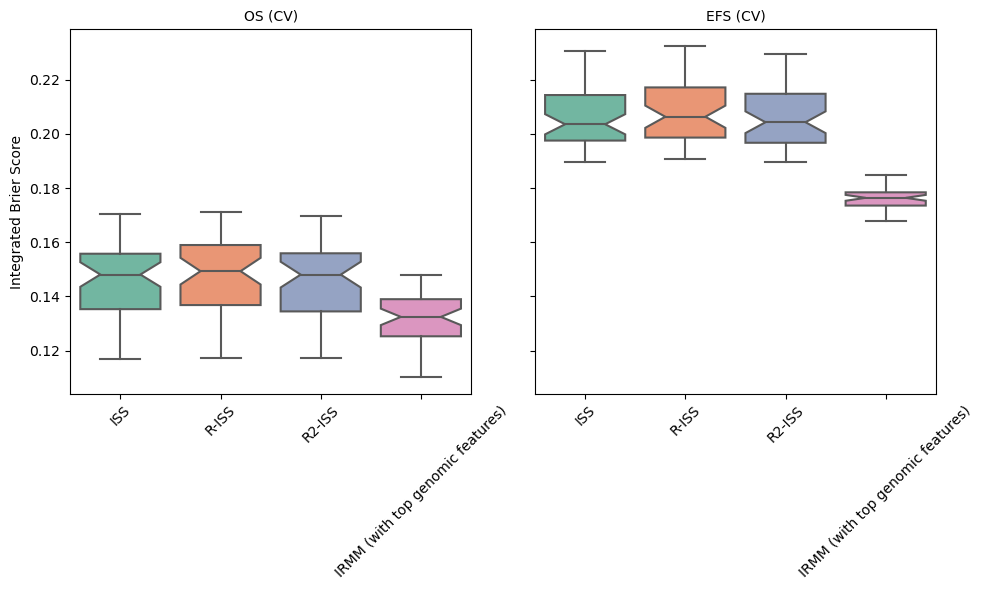

In [26]:
plot_metric('Int_Brier_Score', df_brier_os, df_brier_efs, 'Integrated Brier Score')


In [27]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1..: Negative Binomial Log Likelihood (NBLL)'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1..: Negative Binomial Log Likelihood (NBLL)</strong></h1>

No handles with labels found to put in legend.


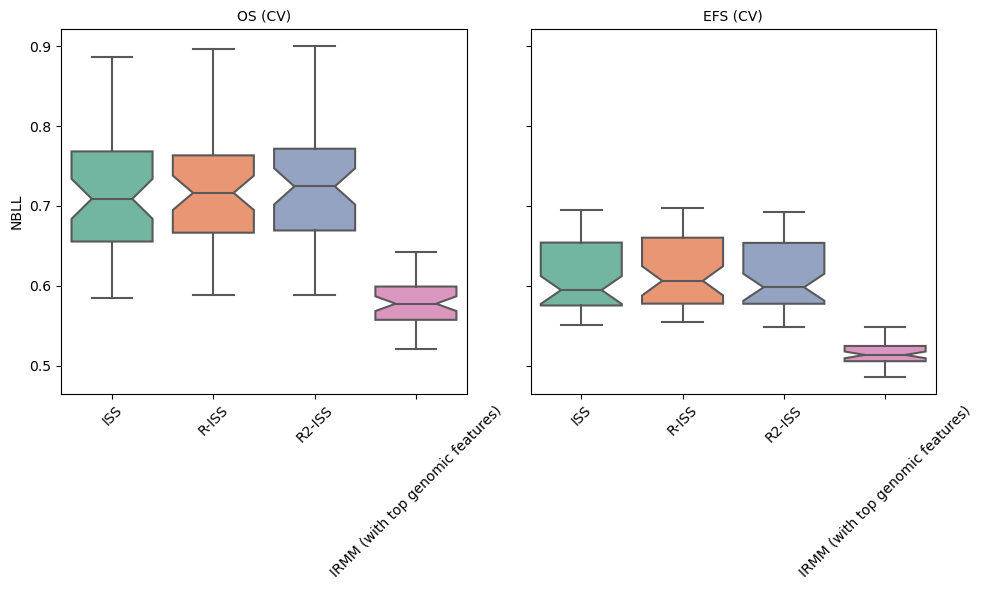

In [28]:
plot_metric('NBLL', df_nbll_os, df_nbll_efs, 'NBLL')


In [29]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S1c: Harrell C-index (OS & EFS) on Heidelberg cohort across time'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S1c: Harrell C-index (OS & EFS) on Heidelberg cohort across time</strong></h1>

In [30]:
# External test set (Heidelberg)
# Groups: ISS, IRMM (with top genomic features)
group_all = '2~9~100'

In [31]:
# os
outcome_type = os_hd;
df_os_1yr = pd.read_csv(targ_dir + outcome_type + "_365_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_os_2yr = pd.read_csv(targ_dir + outcome_type + "_730_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_os_3yr = pd.read_csv(targ_dir + outcome_type + "_1095_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_os_4yr = pd.read_csv(targ_dir + outcome_type + "_1460_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_os_5yr = pd.read_csv(targ_dir + outcome_type + "_1825_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];

df_os_1yr['time_yr'] = 1; df_os_2yr['time_yr'] = 2; df_os_3yr['time_yr'] = 3; df_os_4yr['time_yr'] = 4; df_os_5yr['time_yr'] = 5

df_os_hd_time = df_os_1yr.append(df_os_2yr, ignore_index=True).append(df_os_3yr, ignore_index=True).append(df_os_4yr, ignore_index=True).append(df_os_5yr, ignore_index=True)

In [32]:
# efs
outcome_type = efs_hd; 
df_efs_1yr = pd.read_csv(targ_dir + outcome_type + "_365_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_efs_2yr = pd.read_csv(targ_dir + outcome_type + "_730_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_efs_3yr = pd.read_csv(targ_dir + outcome_type + "_1095_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_efs_4yr = pd.read_csv(targ_dir + outcome_type + "_1460_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];
df_efs_5yr = pd.read_csv(targ_dir + outcome_type + "_1825_group_" + group_all + ".csv")[[var_name_c, 'X_ID']];

df_efs_1yr['time_yr'] = 1; df_efs_2yr['time_yr'] = 2; df_efs_3yr['time_yr'] = 3; df_efs_4yr['time_yr'] = 4; df_efs_5yr['time_yr'] = 5

df_efs_hd_time = df_efs_1yr.append(df_efs_2yr, ignore_index=True).append(df_efs_3yr, ignore_index=True).append(df_efs_4yr, ignore_index=True).append(df_efs_5yr, ignore_index=True)

In [33]:
# rename
df_os_hd_time = pd.merge(df_os_hd_time, rename_x_id_df, left_on='X_ID', right_on='old')
df_os_hd_time = df_os_hd_time.dropna(subset=[var_name_c])

df_efs_hd_time = pd.merge(df_efs_hd_time, rename_x_id_df, left_on='X_ID', right_on='old')
df_efs_hd_time = df_efs_hd_time.dropna(subset=[var_name_c])

In [34]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

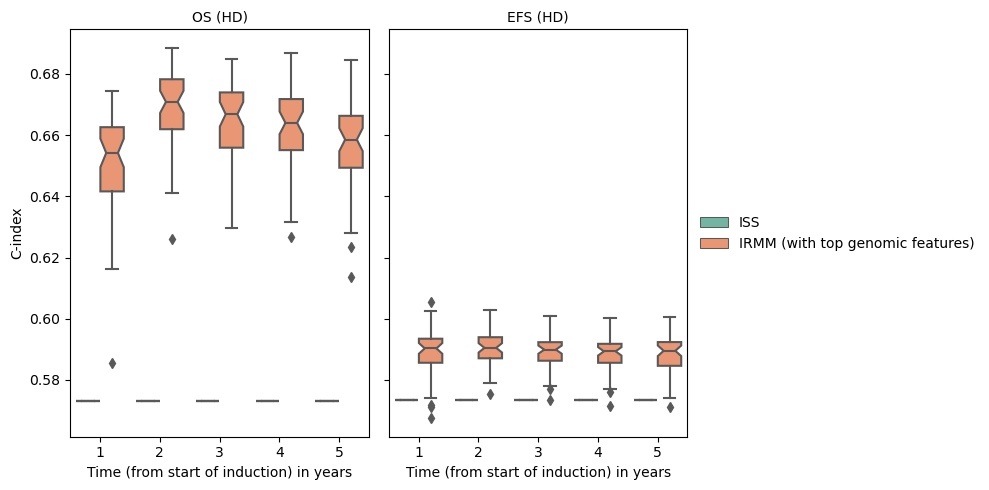

In [35]:
hue_order = ['ISS', 'IRMM (with top genomic features)']

fig, axs = plt.subplots(1, 2, sharey=True)

ax_os, ax_efs = axs.flatten()

# os (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_os_hd_time, notch=True, hue_order=hue_order, ax=ax_os);
ax_os.set_xlabel('Time (from start of induction) in years') ; ax_os.set_ylabel('C-index') ; ax_os.get_legend().remove()
ax_os.set_title('OS (HD)')

# efs (cv)
sns.boxplot(x='time_yr', y=var_name_c, hue='ID', palette='Set2', data=df_efs_hd_time, notch=True, hue_order=hue_order, ax=ax_efs);
ax_efs.set_xlabel('Time (from start of induction) in years') ; ax_efs.set_ylabel('') ; ax_efs.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax_efs.set_title('EFS (HD)')
plt.tight_layout()

In [36]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#f67b51','II. Feature selection (1933 patients)'))

</font><h1><strong><font color=#f67b51>II. Feature selection (1933 patients)</strong></h1>

In [37]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S2a: Feature ranking based on permutation importance'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S2a: Feature ranking based on permutation importance</strong></h1>

In [38]:
model = 'neural_cox_non_prop'
output_files = glob.glob(base_dir + "/data_out/expt_1/permut_feat_imps/compose/*_all_feat_*" + model + "*.csv")
data_list = []
for filename in output_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    data_list.append(df)
    df['fold'] = filename.split('/')[-1].split('_')[1]

concat_feats = pd.concat(data_list, axis=0, ignore_index=True)

concat_feats = concat_feats[['group', 'class_generic', 'weight', 'std', 'fold', 'column_id']]

overall_fea_class = pd.read_excel(base_dir + '/data_in/legend_PMMM_2022.xlsx')
concat_feats = pd.merge(concat_feats, overall_fea_class[['column_id', 'display_id']],
                        on='column_id', how='inner')

unique_feat_groups = concat_feats['class_generic'].unique().tolist()
color = ['deepskyblue', 'pink', 'orange', 'forestgreen', 'violet', 'gray']
concat_feats['color'] = ''
for i, item in enumerate(unique_feat_groups):
    # print(item, color[i])
    concat_feats['color'].mask(concat_feats['class_generic'] == item, color[i], inplace=True)

concat_feats['display_id'] = concat_feats['display_id'].str.replace(r'(CNV_)|(CNV\.SNV_)|(SNV_)', '', regex=True)

unique_states = ['Progress (P1)', 'Progress & deceased (P1)', 'Progress (P2)', 'Progress & deceased (P2)', 'Non-progress & deceased (P2)'] # concat_feats['group'].unique() # states


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


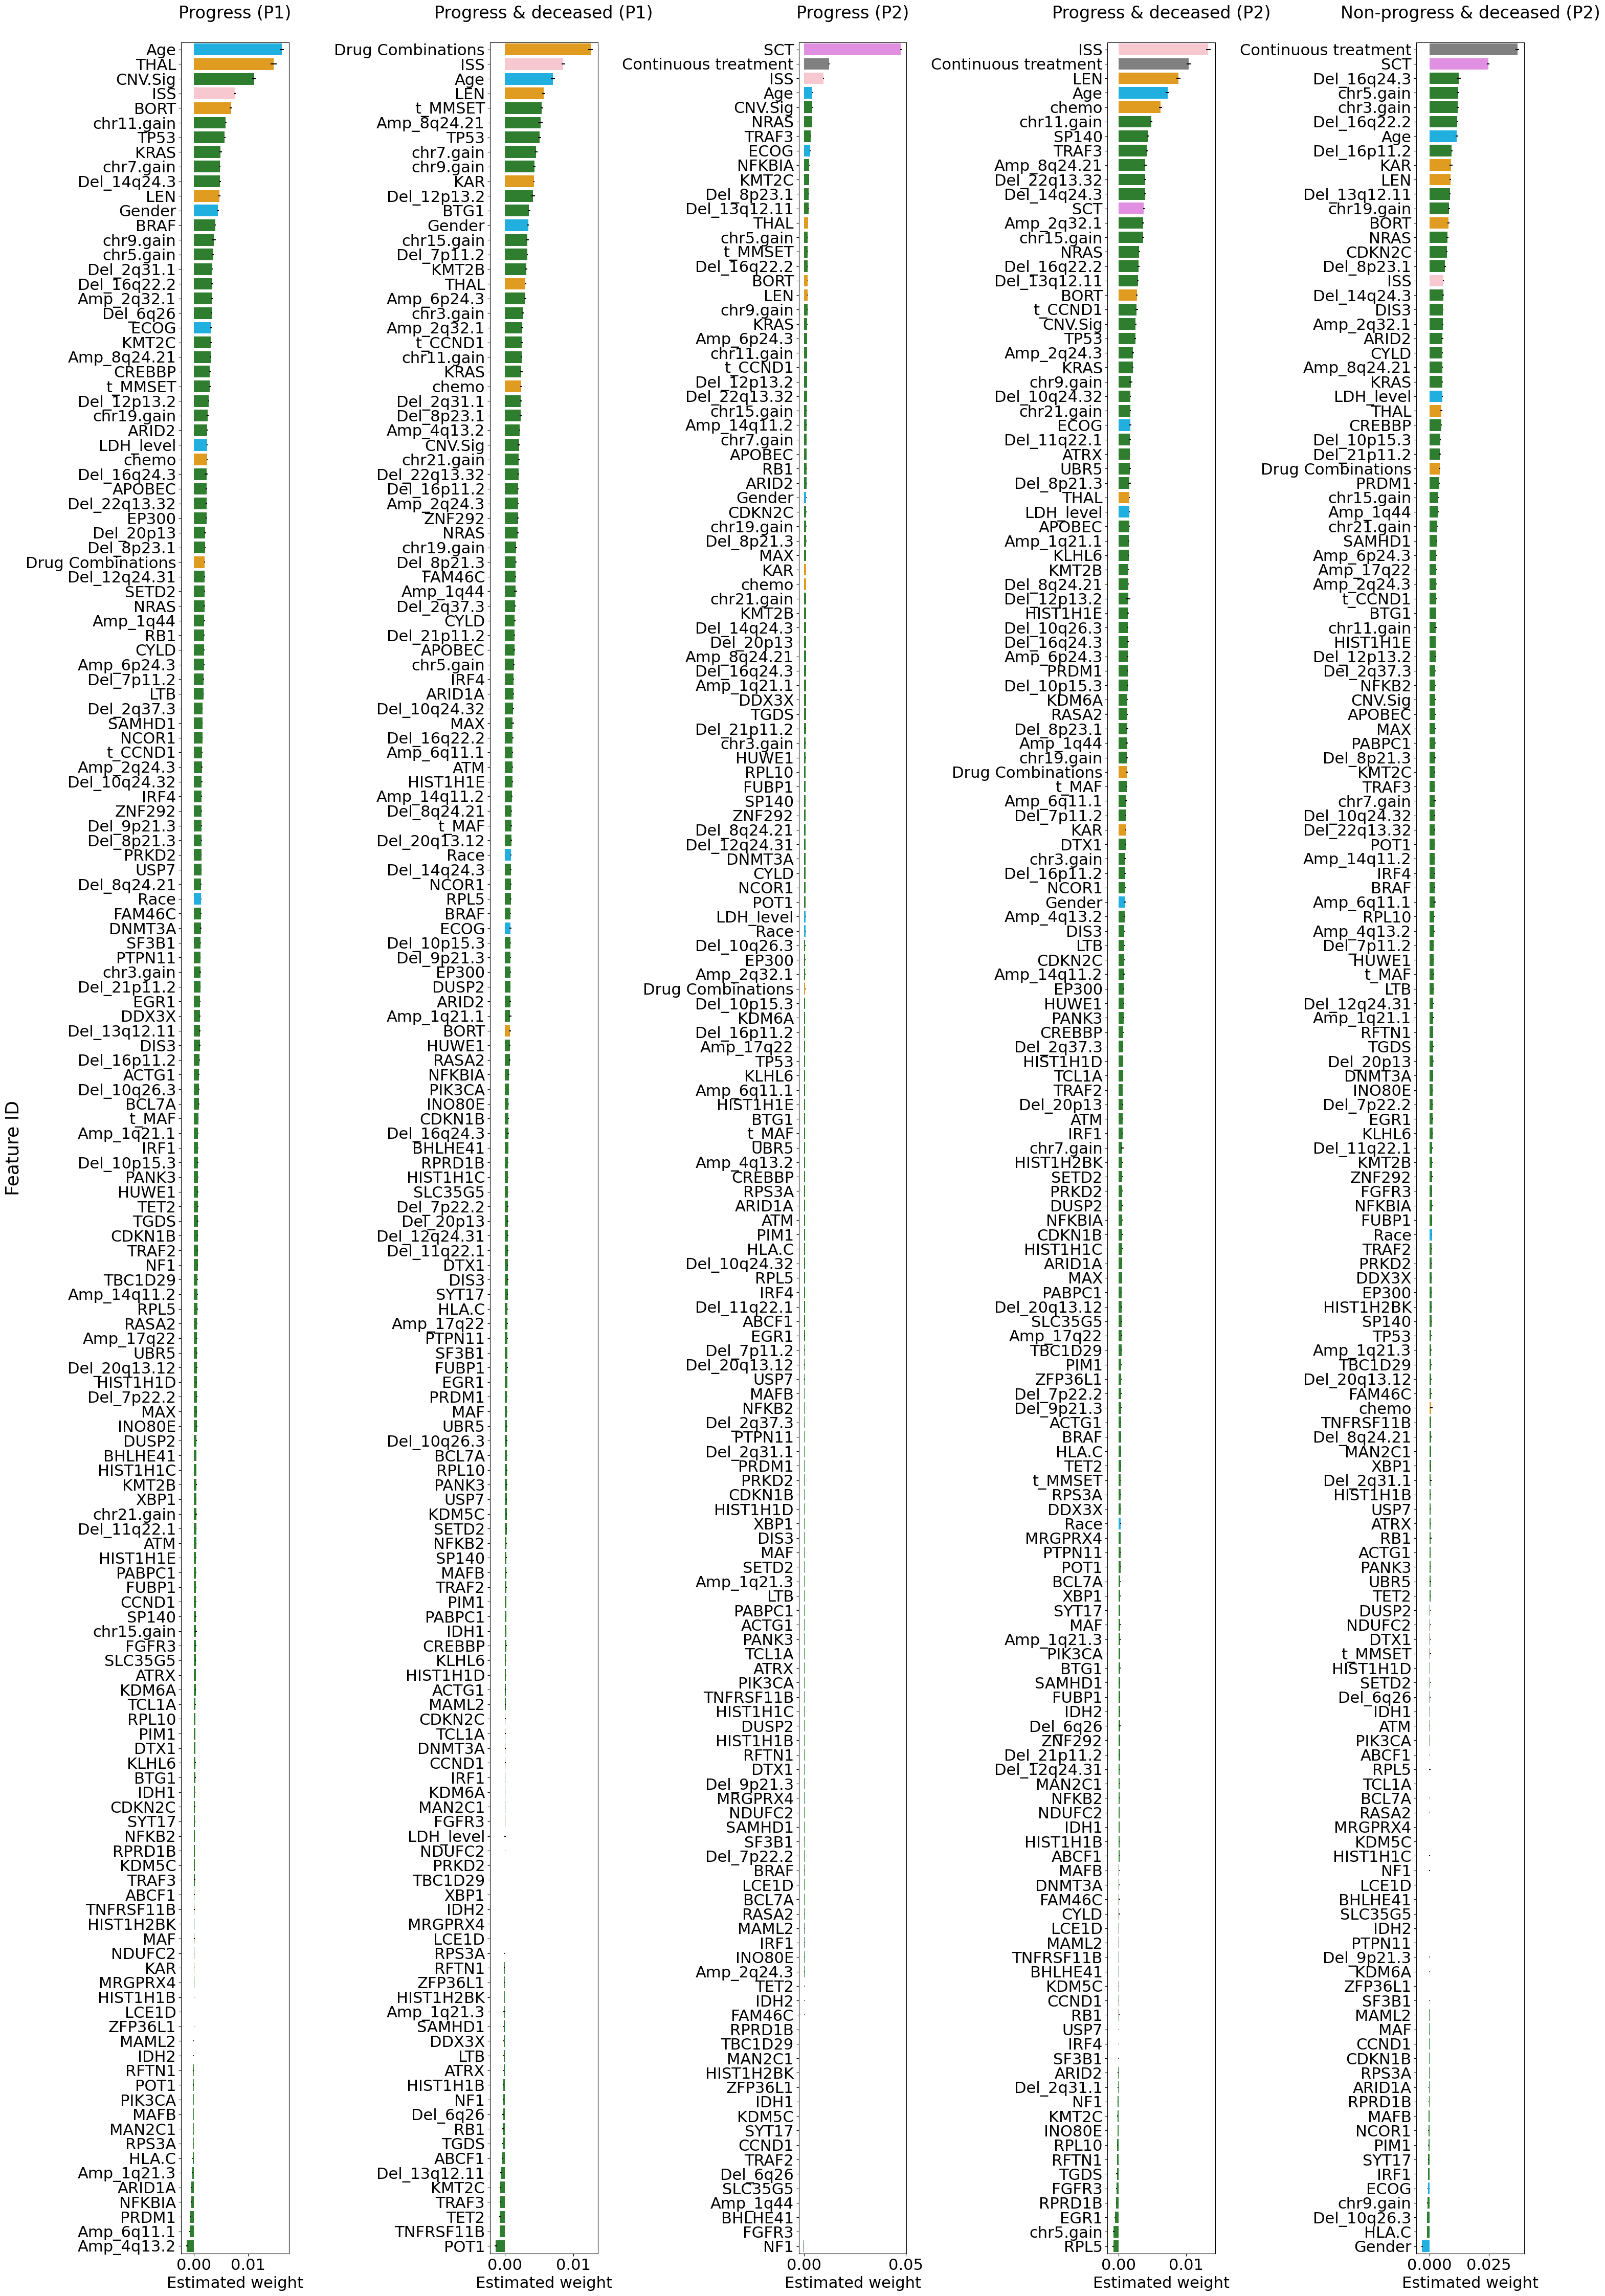

In [39]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 45))
for ind, state in enumerate(unique_states):
    df_inst = concat_feats[(concat_feats['group'] == state)]

    df_inst['std'] = df_inst['std'] / (df_inst[['fold']].max(axis=1) + 1) # np.sqrt(df_inst[['fold']].max(axis=1) + 1)

    df_inst = df_inst.groupby(['column_id', 'display_id', 'color'])['weight', 'std'].mean().reset_index()
    df_inst = df_inst.sort_values(by='weight', ascending=False)

    # df_inst = df_inst.iloc[:50] # top 50 feats

    sns.barplot(y="display_id", x="weight", orient='h', xerr= df_inst['std'] * 1, palette=df_inst['color'], data=df_inst, ax=ax[ind])
    if ind == 0:
        ax[ind].set_ylabel("Feature ID", fontsize=26, fontname="Arial")
    else:
        ax[ind].set_ylabel('')
    ax[ind].set_xlabel("Estimated weight", fontsize=22, fontname="Arial")
    ax[ind].tick_params(axis='both', which='major', labelsize=22)
    ax[ind].set_title(state + '\n', fontsize=24, fontname="Arial")
    fig.tight_layout()

In [40]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S2b: Aggregated group ranking'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S2b: Aggregated group ranking</strong></h1>

In [41]:
dict_class_color = (dict(zip(concat_feats['class_generic'], concat_feats['color'])));
df_class_color = pd.DataFrame(dict_class_color.items(), columns=['class_generic', 'color'])
print(df_class_color)

          class_generic        color
0              Clinical  deepskyblue
1                   ISS         pink
2             Treatment       orange
3              Genomics  forestgreen
4                   SCT       violet
5  Continuous treatment         gray


In [42]:
df_feat_size_class_generic = pd.DataFrame(overall_fea_class.groupby('class_generic')['display_id'].count().reset_index().rename(columns={'display_id': 'num_feats'}))
# print(df_feat_size_class_generic)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


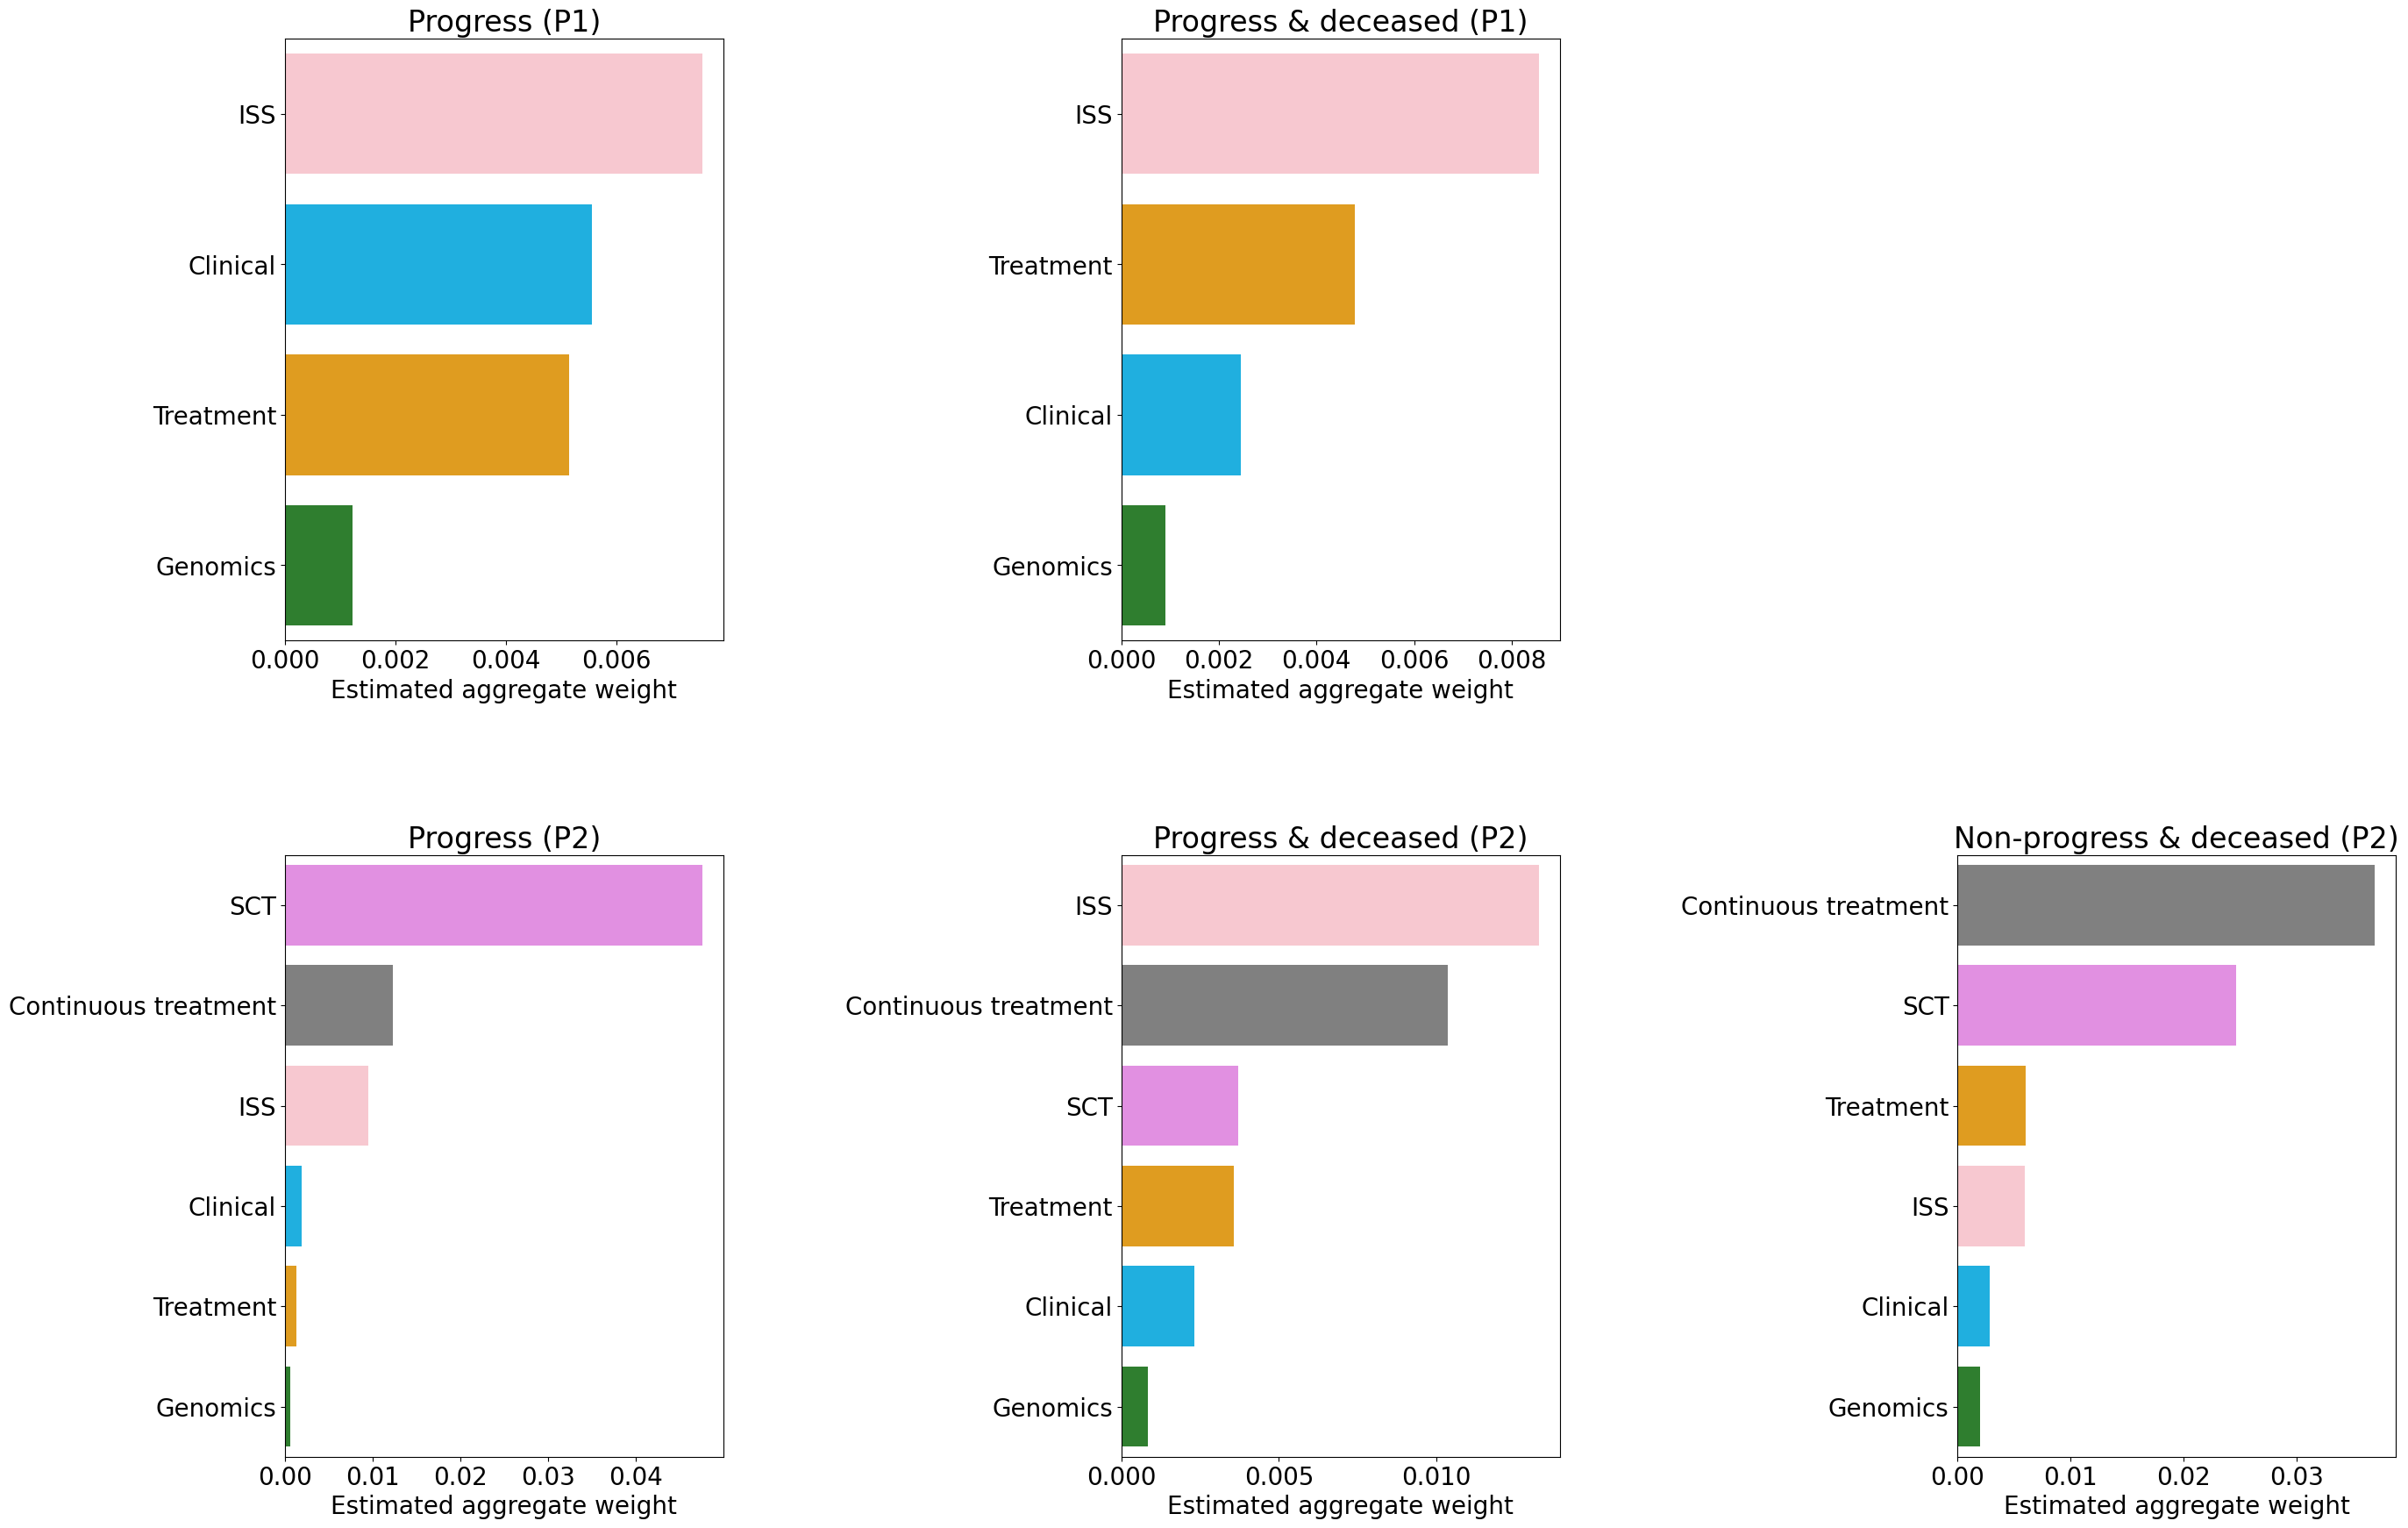

In [43]:
def func_re_weight(df):
    df['re-weighted'] = (1 - (df['num_feats'] / df['num_feats'].sum()))
    df['re-weighted'] = df['weight'] * (1 - df['num_feats'] / df['num_feats'].sum())
    return df.sort_values('re-weighted', ascending=False)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
axes = ax.flatten()

for ind, state in enumerate(unique_states):
    if ind in range(2, 5):
        ind +=1
    ax = axes[ind]

    df_state = concat_feats[concat_feats['group'] == state].groupby('class_generic')['weight'].mean()
    df_weight_class_color = ft.reduce(lambda left, right: pd.merge(left, right, on='class_generic'), 
                         [df_state.reset_index(), df_feat_size_class_generic, 
                          df_class_color])

    df_weight_class_color['weight'] = df_weight_class_color['weight']# .mul(100)
    df_weight_class_color = df_weight_class_color.sort_values('weight', ascending=False)

    sns.barplot(data=df_weight_class_color, y = 'class_generic', x = 'weight', orient = 'h', 
                        palette=df_weight_class_color['color'], ax=ax)

    ax.set_xlabel("Estimated aggregate weight", fontsize=20, fontname="Arial")
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(state + '\n', fontsize=26, fontname="Arial")
    ax.set_title(state, fontsize=24)

fig.delaxes(axes[2])
fig.tight_layout(pad=10)

In [44]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#f67b51','III. Leave-one-out cross validation: train on 1932 patients and test on 1 patient'))

</font><h1><strong><font color=#f67b51>III. Leave-one-out cross validation: train on 1932 patients and test on 1 patient</strong></h1>

In [45]:
# Risk at 5 years

In [46]:
# multistates with probabilities
loocv_pred_multistate_at_5yr = pd.read_csv(base_dir + '/data_out/expt_1/preds_treatment/loo_neural_cox_non_prop_multistate_risks.csv')

In [47]:
# raw data
df_dataset = pd.read_csv(base_dir + '/data_in/PMMM_matrix_12052022.txt', sep='\t');

df_dataset["age_group"] = np.select([(df_dataset.age < 65), (df_dataset.age >= 65) & (df_dataset.age < 75), 
                                     df_dataset.age >= 75, (df_dataset.age is not pd.isnull)], 
                                   ['less than 65 yrs', 'middle / between 65 to 74 yrs', 'more than 75yrs', 'unreported'])

In [48]:
df_dataset["age_group"].unique()

array(['middle / between 65 to 74 yrs', 'less than 65 yrs',
       'more than 75yrs', 'unreported'], dtype=object)

In [49]:
# get time and event code
loocv_pred_multistate_at_5yr = pd.merge(loocv_pred_multistate_at_5yr, 
                    df_dataset[['sample', 'pfs_time', 'pfs_code', 'os_time', 'os_code', 'phase', 
            'SCT_first_line', 'age', 'age_group', 'ISS', 'APOBEC']], on='sample', how='inner')

In [50]:
print(list(loocv_pred_multistate_at_5yr))

['sample', 'Alive in Induction', 'Alive in POD (induction)', 'Alive in Phase 2', 'Alive in POD', 'Death in POD (induction)', 'Death in Phase 2', 'Death in POD (Phase 2)', 'pfs_time', 'pfs_code', 'os_time', 'os_code', 'phase', 'SCT_first_line', 'age', 'age_group', 'ISS', 'APOBEC']


In [51]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S3: Risk of OS and PFS in P1/P2'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S3: Risk of OS and PFS in P1/P2</strong></h1>

In [52]:
# Overall Survival
os_at5yr = loocv_pred_multistate_at_5yr.copy()
os_at5yr['risk'] = 1 - (os_at5yr['Alive in Induction'] + os_at5yr['Alive in POD (induction)'] + os_at5yr['Alive in Phase 2'] + os_at5yr['Alive in POD'])
os_at5yr['event'] = np.select([
                        ((os_at5yr['pfs_code'] == 1)|(os_at5yr['os_code'] == 1)) & (os_at5yr['phase'] == 'Phase1-only'),
                        ((os_at5yr['pfs_code'] == 1)|(os_at5yr['os_code'] == 1)) & (os_at5yr['phase'] == 'Phase2'),
                        ((os_at5yr['pfs_code'] == 0)|(os_at5yr['os_code'] == 0)) 
                            & ((os_at5yr['phase'] == 'Phase2') | (os_at5yr['phase'] == 'Phase1-only')),
                              ], 
                    ['POD/Dec. in P1', 'POD/Dec. in P2', 'Alive in P1/P2'])
print('Survival risk min, max', os_at5yr['risk'].min(), os_at5yr['risk'].max())


Survival risk min, max 0.17344239330165923 0.5318141208497993


In [53]:
os_at5yr.groupby(['event']).size()

event
Alive in P1/P2    729
POD/Dec. in P1    351
POD/Dec. in P2    853
dtype: int64

In [54]:
# POD / Dec.
pod_or_dec_at5yr = loocv_pred_multistate_at_5yr.copy()
pod_or_dec_at5yr['risk'] = 1 - pod_or_dec_at5yr['Alive in Phase 2']
pod_or_dec_at5yr['event'] = np.select([
                        ((pod_or_dec_at5yr['pfs_code'] == 1)|(pod_or_dec_at5yr['os_code'] == 1)) & (pod_or_dec_at5yr['phase'] == 'Phase1-only'),
                        ((pod_or_dec_at5yr['pfs_code'] == 1)|(pod_or_dec_at5yr['os_code'] == 1)) & (os_at5yr['phase'] == 'Phase2'),
                        ((pod_or_dec_at5yr['pfs_code'] == 0)|(pod_or_dec_at5yr['os_code'] == 0)) 
                            & ((pod_or_dec_at5yr['phase'] == 'Phase2') | (pod_or_dec_at5yr['phase'] == 'Phase1-only')),
                              ], 
                    ['POD/Dec. in P1', 'POD/Dec. in P2', 'Alive in P1/P2'])

print('PFS risk min, max', pod_or_dec_at5yr['risk'].min(), pod_or_dec_at5yr['risk'].max())

PFS risk min, max 0.514208396648135 0.882042845421148


In [55]:
pod_or_dec_at5yr.groupby(['event']).size()

event
Alive in P1/P2    729
POD/Dec. in P1    351
POD/Dec. in P2    853
dtype: int64

In [56]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (14, 12),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

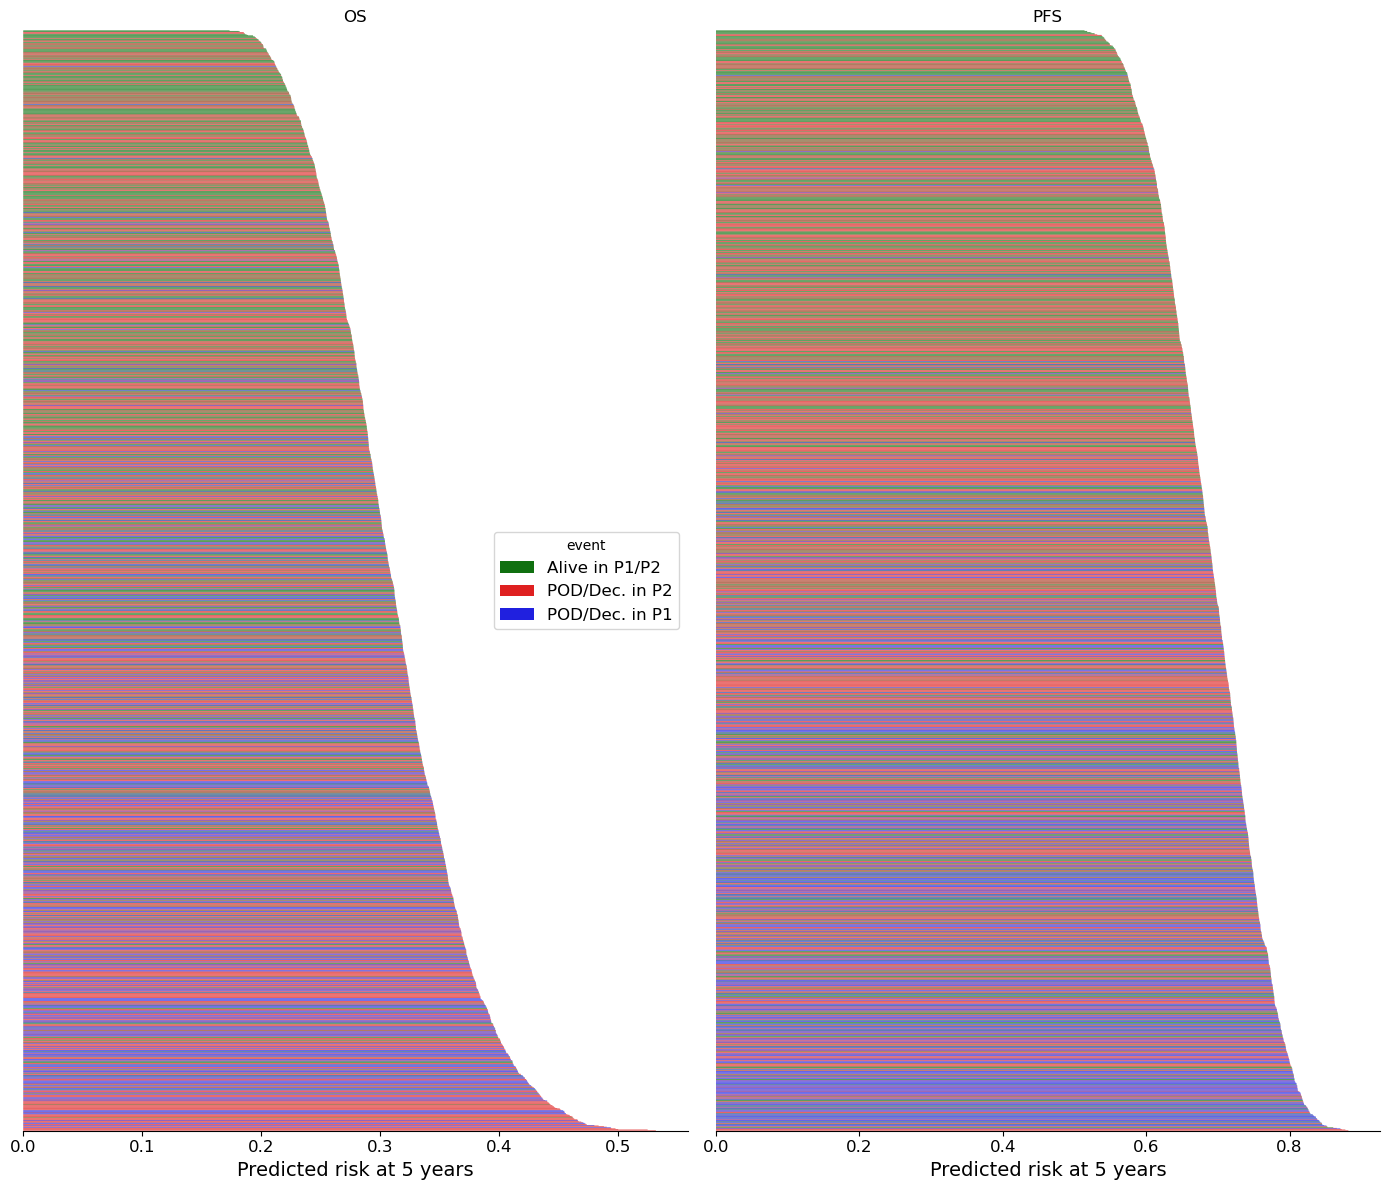

In [57]:
os_at5yr = os_at5yr.sort_values(by='risk', ascending=True)
pod_or_dec_at5yr = pod_or_dec_at5yr.sort_values(by='risk', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(data=os_at5yr, x="risk", y="sample", hue="event", dodge=False, snap=False, palette=['green', 'red', 'blue'], ax=ax1)
sns.barplot(data=pod_or_dec_at5yr, x="risk", y="sample", hue="event", dodge=False, snap=False, palette=['green', 'red', 'blue'], ax=ax2)

for ax_, outcom_var in [(ax1, 'OS'), (ax2, 'PFS')]:
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)
    ax_.spines['left'].set_visible(False)
    ax_.set_xlabel('Predicted risk at 5 years', fontsize=14)
    ax_.set_yticks([])
    ax_.set_ylabel('')
    ax_.set_title(outcom_var)
    if ax_ == ax1:
        plt.legend([], [], frameon=False)
plt.tight_layout()

In [58]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S4a: Risk density of OS at 5 years'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S4a: Risk density of OS at 5 years</strong></h1>

In [59]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (14, 12),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

All samples


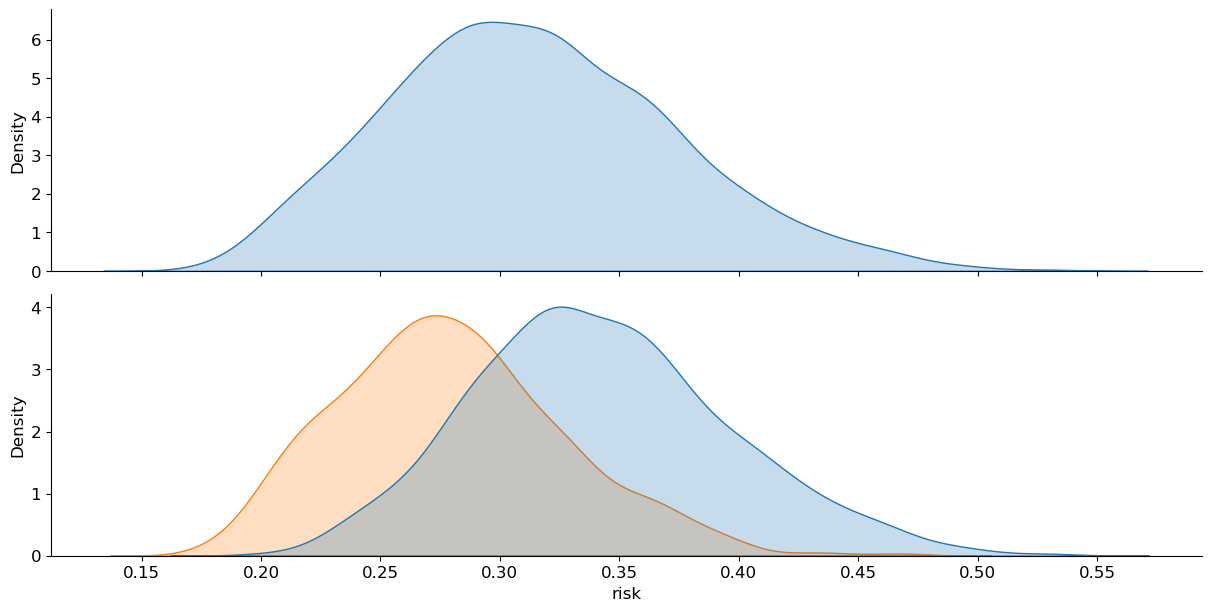

In [60]:
print('All samples')
# kernel density estimation of Risk for OS
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
sns.kdeplot(data=os_at5yr, x="risk", fill=True, ax=ax0)
sns.kdeplot(data=os_at5yr, x='risk', hue='SCT_first_line', fill=True, ax=ax1, legend=False)

for ax in [ax0, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(MultipleLocator(0.05))

In [61]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S4b: Stratify by features for risk density of OS at 5 years'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S4b: Stratify by features for risk density of OS at 5 years</strong></h1>

In [62]:
feats = ['APOBEC', 'ISS', 'age_group'] 

APOBEC
0.0        908
1.0        454
2.0        152
unknown    419
dtype: int64
ISS
ISS1       637
ISS2       668
ISS3       509
unknown    119
dtype: int64
age_group
less than 65 yrs                 891
middle / between 65 to 74 yrs    632
more than 75yrs                  266
unreported                       144
dtype: int64


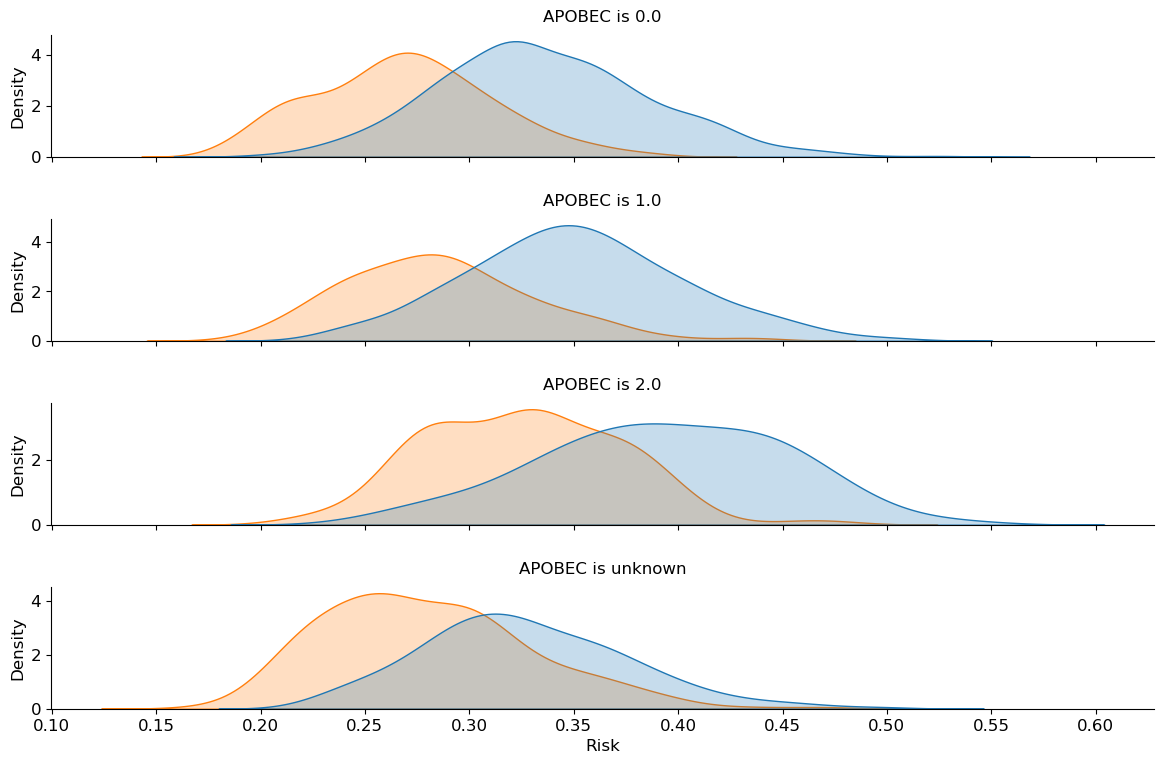

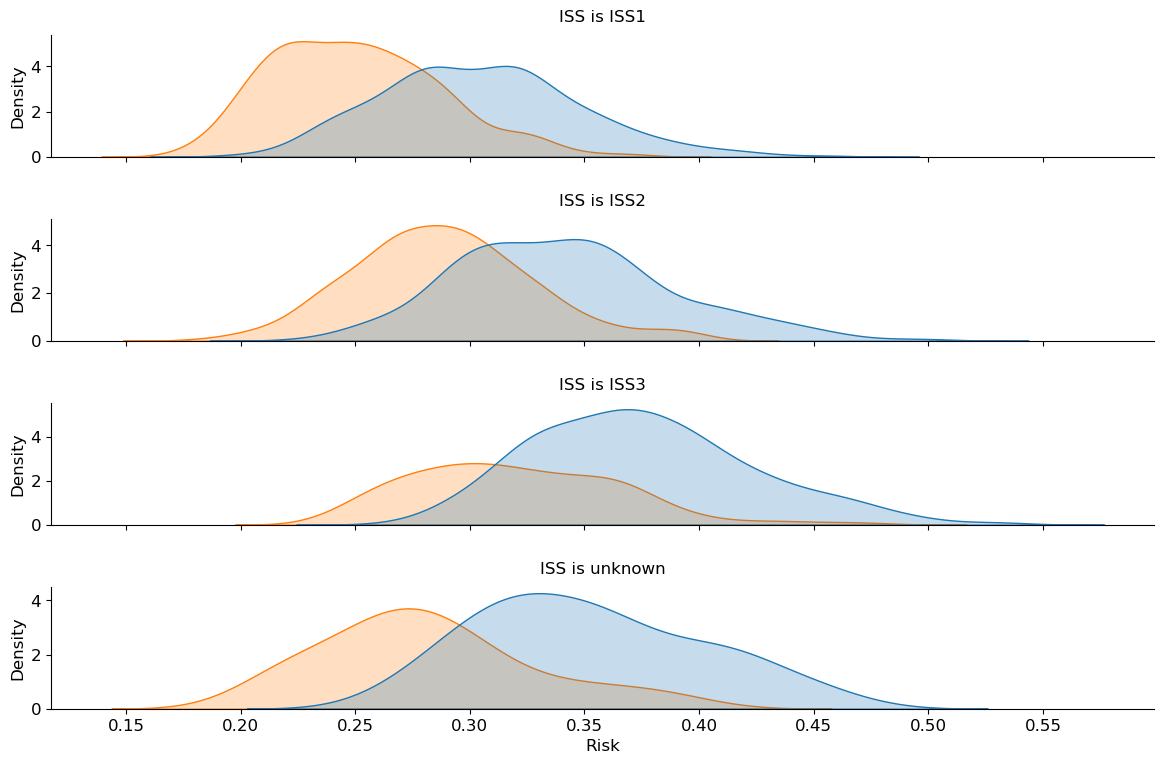

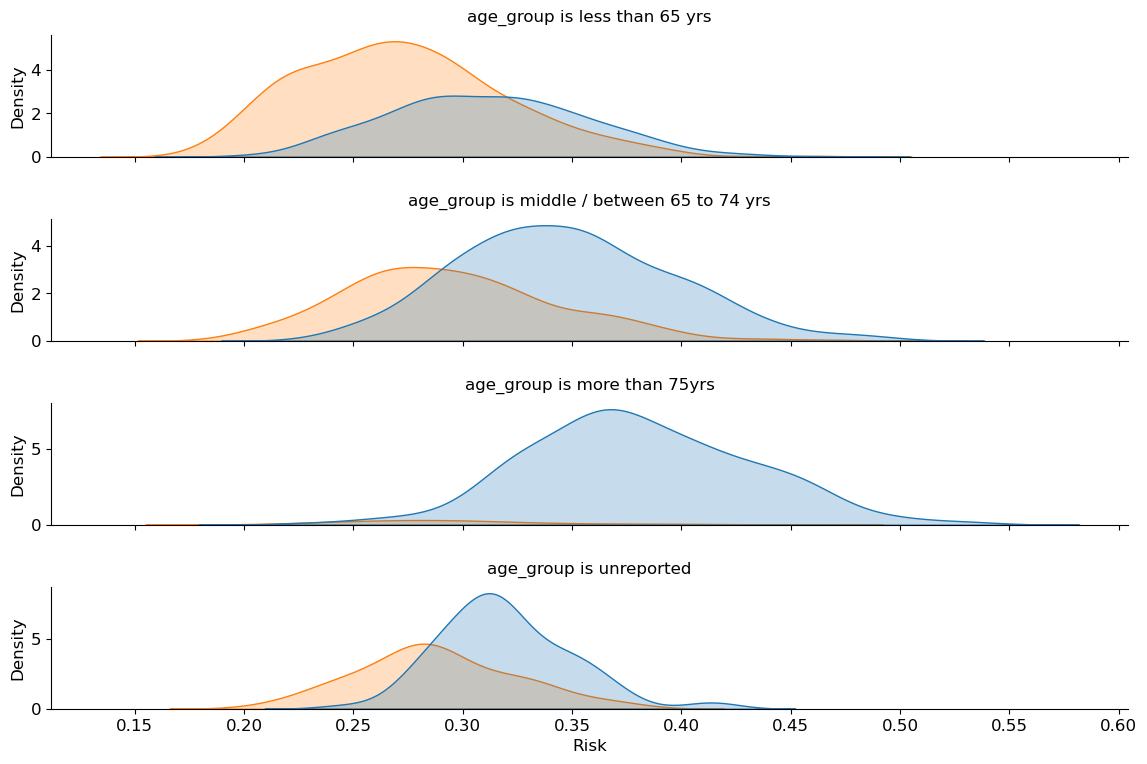

In [63]:
os_at5yr = os_at5yr.fillna('unknown')
for item in feats:
    print(os_at5yr.groupby([item], dropna=False).size())
    unique_vals_for_item = os_at5yr[item].unique().tolist()
    unique_vals_for_item.sort(key=lambda e: (isinstance(e, str), e))
    
    fig, ax = plt.subplots(ncols=1, nrows=len(unique_vals_for_item), sharex=True, figsize=(12, 8))
    plt.title(item.upper(), fontsize=20)
    axes = ax.flatten()
    for ind, val_feat in enumerate(unique_vals_for_item):
        sns.kdeplot(data=os_at5yr[os_at5yr[item] == val_feat], x='risk', hue='SCT_first_line', fill=True, ax=axes[ind], legend=False)
        axes[ind].set_title(item + ' is ' + str(val_feat), pad=10)
        axes[ind].set_xlabel('Risk')
        axes[ind].spines['top'].set_visible(False)
        axes[ind].spines['right'].set_visible(False)
        axes[ind].xaxis.set_major_locator(MultipleLocator(0.05))
    
    fig.tight_layout(pad=2.0)

In [64]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S4c: Risk density of PFS at 5 years'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S4c: Risk density of PFS at 5 years</strong></h1>

In [65]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (14, 12),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

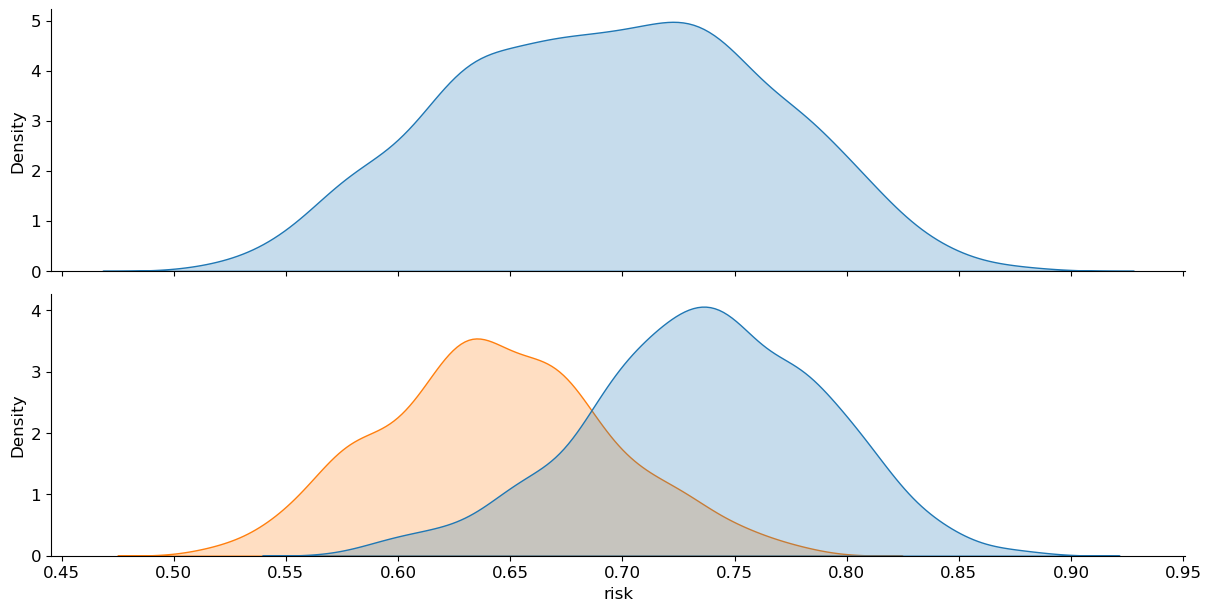

In [66]:
# kernel density estimation of Risk for PFS

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
sns.kdeplot(data=pod_or_dec_at5yr, x="risk", fill=True, ax=ax0)
sns.kdeplot(data=pod_or_dec_at5yr, x='risk', hue='SCT_first_line', fill=True, ax=ax1, legend=False)

for ax in [ax0, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_major_locator(MultipleLocator(0.05))

In [67]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S4d: Stratify by features for risk density of PFS at 5 years'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S4d: Stratify by features for risk density of PFS at 5 years</strong></h1>

APOBEC
0.0        908
1.0        454
2.0        152
unknown    419
dtype: int64
ISS
ISS1       637
ISS2       668
ISS3       509
unknown    119
dtype: int64
age_group
less than 65 yrs                 891
middle / between 65 to 74 yrs    632
more than 75yrs                  266
unreported                       144
dtype: int64


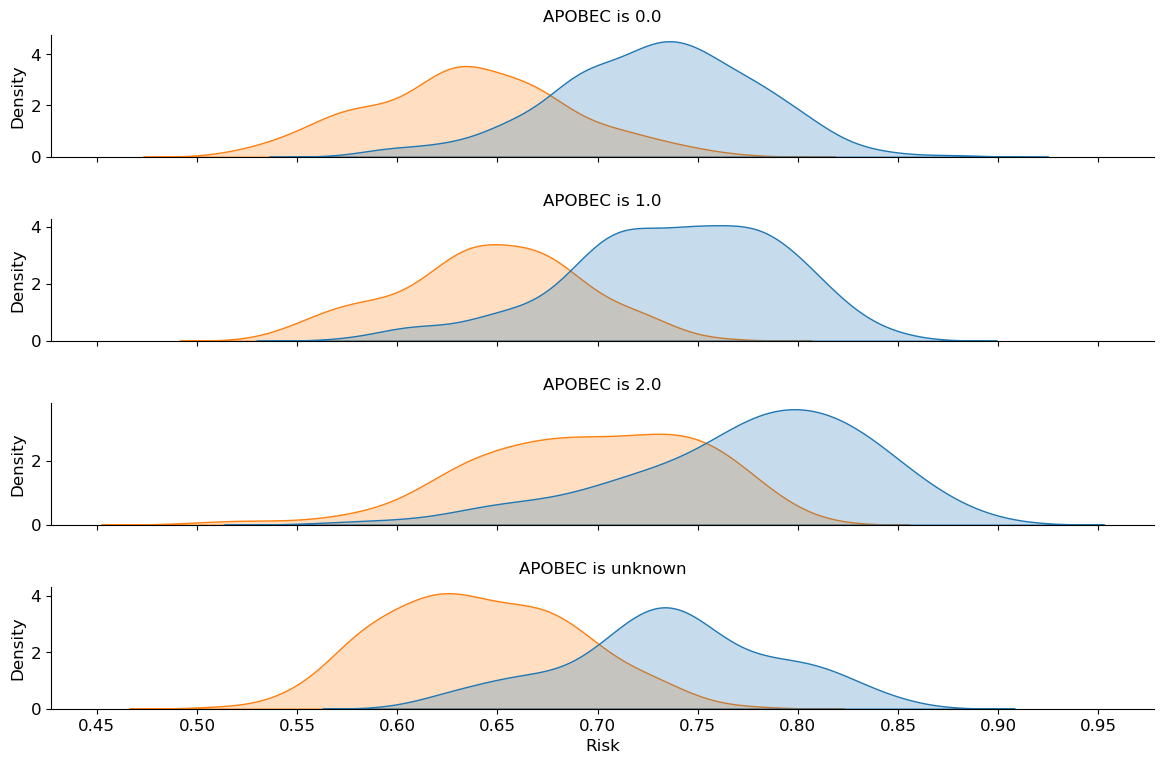

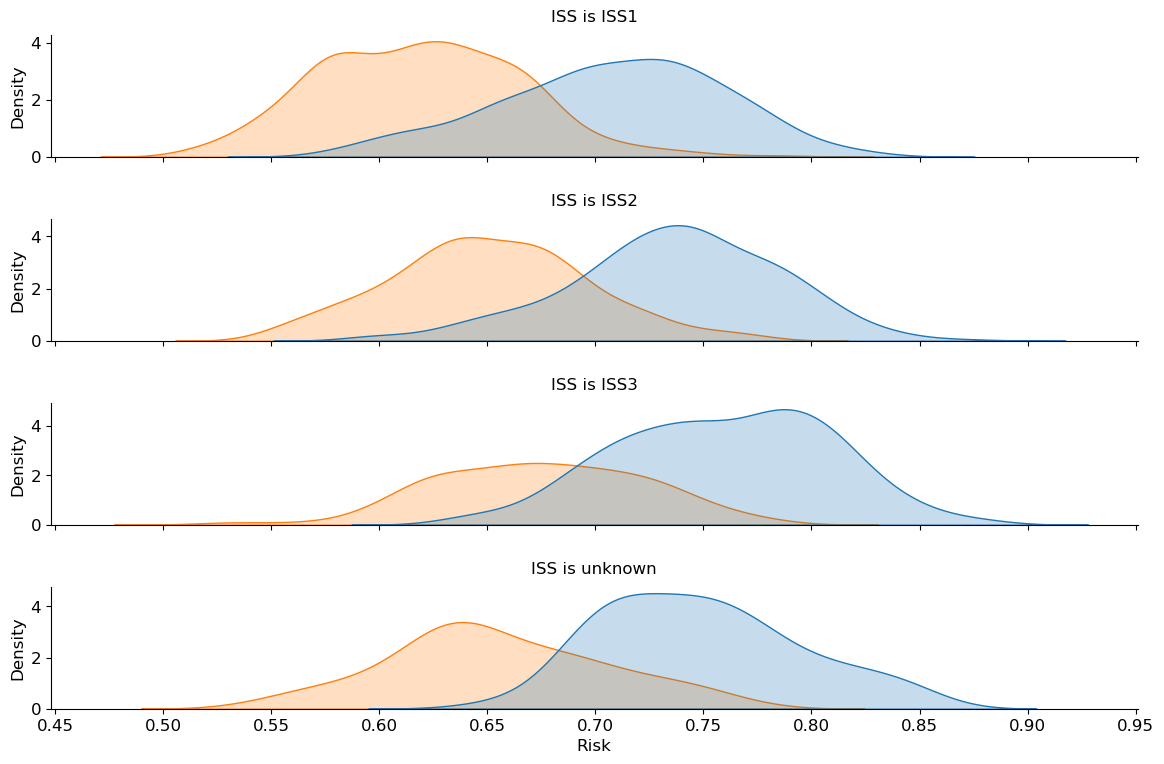

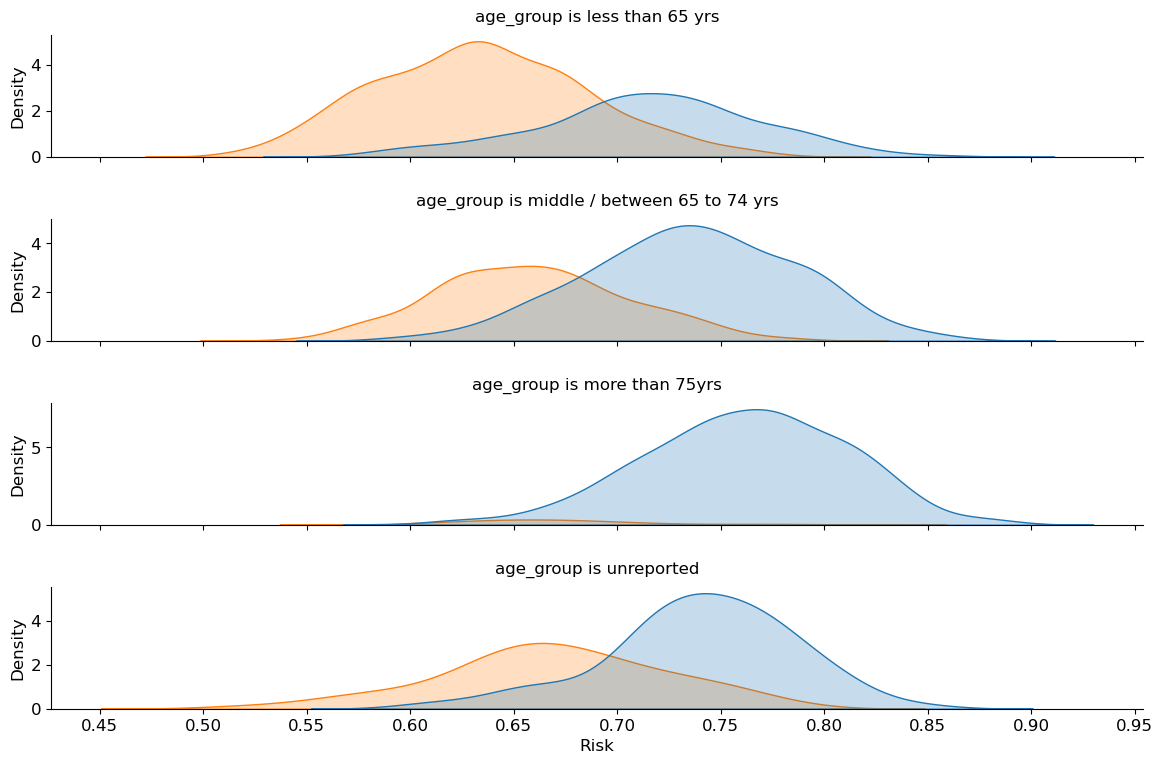

In [68]:
pod_or_dec_at5yr = pod_or_dec_at5yr.fillna('unknown')

for item in feats:
    print(pod_or_dec_at5yr.groupby([item], dropna=False).size())
    unique_vals_for_item = pod_or_dec_at5yr[item].unique().tolist()
    unique_vals_for_item.sort(key=lambda e: (isinstance(e, str), e))
    
    fig, ax = plt.subplots(ncols=1, nrows=len(unique_vals_for_item), sharex=True, figsize=(12, 8))
    plt.title(item.upper(), fontsize=20)
    axes = ax.flatten()
    for ind, val_feat in enumerate(unique_vals_for_item):
        sns.kdeplot(data=pod_or_dec_at5yr[pod_or_dec_at5yr[item] == val_feat], x='risk', hue='SCT_first_line', fill=True, ax=axes[ind], legend=False)
        axes[ind].set_title(item + ' is ' + str(val_feat), pad=10)
        axes[ind].set_xlabel('Risk')
        axes[ind].spines['top'].set_visible(False)
        axes[ind].spines['right'].set_visible(False)
        axes[ind].xaxis.set_major_locator(MultipleLocator(0.05))
    
    fig.tight_layout(pad=2.0)

In [69]:
# To revisit: From the fraction of patients that recieved SCT, we can see who benefits according to overall/progression-free survival

In [70]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#f67b51','IV. Risk comparisons between 1933 samples (CV) and Heidelberg (HD) cohort'))

</font><h1><strong><font color=#f67b51>IV. Risk comparisons between 1933 samples (CV) and Heidelberg (HD) cohort</strong></h1>

In [71]:
dir_all_states = base_dir + '/data_out/expt_1/kfold/state_probs/all_states/'

group_9_cv = dir_all_states + 'group~9~*'
list_files_gp_9_cv = glob.glob(group_9_cv)

test_group_9_hd = dir_all_states + 'testGroup~hd~*'
list_files_test_gp_9_hd = glob.glob(test_group_9_hd)

In [72]:
len(list_files_gp_9_cv), len(list_files_test_gp_9_hd)

(19330, 12800)

In [73]:
## CV
time_risk_days = 1825

## group + top genomics
risk_gp_9_cv = pd.DataFrame()
for filename in list_files_gp_9_cv:
    sample_id = filename.split('/')[-1].split('~')[3]
    single_df = pd.read_csv(filename, index_col=None, header=0)
    single_df = single_df[single_df['Time (Days)'] == time_risk_days]
    single_df['sample_id'] = sample_id
    risk_gp_9_cv = pd.concat([risk_gp_9_cv, single_df], ignore_index=True, axis=0)

risk_gp_9_cv['sample_id'] = risk_gp_9_cv['sample_id'].str.replace('\.', '-', regex=True)
risk_gp_9_cv = risk_gp_9_cv.groupby('sample_id').mean().reset_index()

risk_gp_9_cv['risk_os'] = 1 - (risk_gp_9_cv['Alive in Induction'] + risk_gp_9_cv['Alive in POD (induction)'] + risk_gp_9_cv['Alive in Phase 2'] + risk_gp_9_cv['Alive in POD'])
risk_gp_9_cv['risk_pfs'] = 1 - risk_gp_9_cv['Alive in Phase 2']

In [74]:
## Heidelberg
time_risk_days = 1825

## group + top genomics
risk_gp_9_hd = pd.DataFrame()
for filename in list_files_test_gp_9_hd:
    sample_id = filename.split('/')[-1].split('~')[2]
    single_df = pd.read_csv(filename, index_col=None, header=0)
    single_df = single_df[single_df['Time (Days)'] == time_risk_days]
    single_df['sample_id'] = sample_id
    risk_gp_9_hd = pd.concat([risk_gp_9_hd, single_df], ignore_index=True, axis=0)

risk_gp_9_hd['sample_id'] = risk_gp_9_hd['sample_id'].str.replace('\.', '-', regex=True)
risk_gp_9_hd = risk_gp_9_hd.groupby('sample_id').mean().reset_index()

risk_gp_9_hd['risk_os'] = 1 - (risk_gp_9_hd['Alive in Induction'] + risk_gp_9_hd['Alive in POD (induction)'] + risk_gp_9_hd['Alive in Phase 2'] + risk_gp_9_hd['Alive in POD'])
risk_gp_9_hd['risk_pfs'] = 1 - risk_gp_9_hd['Alive in Phase 2']

In [75]:
risk_gp_9_cv.shape, risk_gp_9_hd.shape

((1933, 11), (256, 11))

In [76]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S5a: Risk density between leave-one-out (LOOCV) and mean 50-fold CV'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S5a: Risk density between leave-one-out (LOOCV) and mean 50-fold CV</strong></h1>

In [77]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

Text(0, 0.5, '')

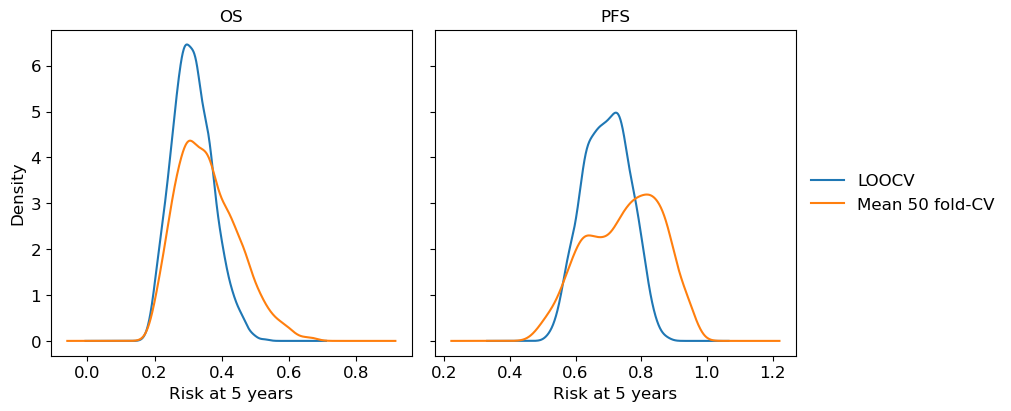

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
os_at5yr['risk'].plot.kde(ax=ax1) ; 
risk_gp_9_cv['risk_os'].plot.kde(ax=ax1)
ax1.set_xlabel('Risk at 5 years') ; ax1.set_title('OS')

pod_or_dec_at5yr['risk'].plot.kde(ax=ax2)
risk_gp_9_cv['risk_pfs'].plot.kde(ax=ax2)
ax2.legend(labels=['LOOCV', 'Mean 50 fold-CV'], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) ; 
ax2.set_xlabel('Risk at 5 years') ; ax2.set_title('PFS') ; ax2.set_ylabel('')

In [79]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S5b: Risk density between CV and HD cohort'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S5b: Risk density between CV and HD cohort</strong></h1>

In [80]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

Text(0, 0.5, '')

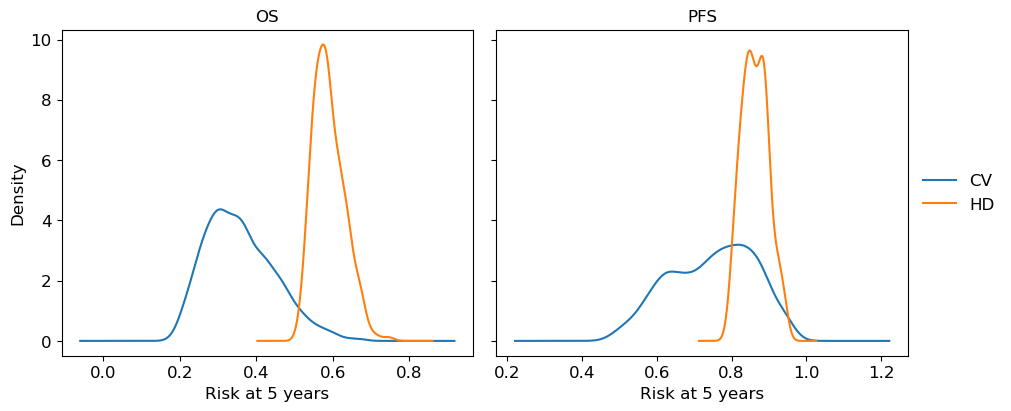

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
risk_gp_9_cv['risk_os'].plot.kde(ax=ax1) ; 
risk_gp_9_hd['risk_os'].plot.kde(ax=ax1)
ax1.set_xlabel('Risk at 5 years') ; ax1.set_title('OS')

risk_gp_9_cv['risk_pfs'].plot.kde(ax=ax2)
risk_gp_9_hd['risk_pfs'].plot.kde(ax=ax2)
ax2.legend(labels=['CV', 'HD'], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) ; 
ax2.set_xlabel('Risk at 5 years') ; ax2.set_title('PFS') ; ax2.set_ylabel('')

In [82]:
feat_gp_combos = pd.read_csv(base_dir + '/data_out/expt_1/feat_matrix/' + 'main_keeper.csv')
feat_gp_combos = feat_gp_combos[feat_gp_combos['group_id'] == 9]
list_top_feats_IRMM = feat_gp_combos['feat_combo'].to_list()
list_top_feats_IRMM = [feat for feats in list_top_feats_IRMM for feat in feats.split()] + ['sample']

In [83]:
def clean_transform_raw_data(df):
    df_cp = df.copy()

    df_cp.drop(['os_code', 'os_time', 'pfs_code', 'pfs_time', 'time_SCT', 'duration', 'study', 'phase', 'DARA', 'ELO', 'SCT_line'], axis=1, inplace=True)

    df_feats = df_cp
    # map clinical vars
    map_gender = {'male': 0, 'female': 1}
    df_feats = df_feats.replace({'gender': map_gender})

    map_ecog = {'ecog<2': 0, 'ecog>=2': 1}
    df_feats = df_feats.replace({'ecog': map_ecog})

    map_iss = {'ISS1': 0, 'ISS2': 1, 'ISS3': 2, 'I': 0, 'II': 1, 'III': 2}
    df_feats = df_feats.replace({'ISS': map_iss})

    map_r_iss = {'R-ISS1': 0, 'R-ISS2': 1, 'R-ISS3': 2}
    df_feats = df_feats.replace({'R_ISS': map_r_iss})

    map_r2_iss = {'I': 0, 'II': 1, 'III': 2, 'IV':3}
    df_feats = df_feats.replace({'R2_ISS': map_r2_iss})

    df_feats["combo"] = np.select([df_feats.combo <= 1, df_feats.combo > 1], [0, 1])

    map_ldh = {'Low': 0, 'High': 1, 'Normal': 2}
    df_feats = df_feats.replace({'LDH_level': map_ldh})

    map_race = {'WHITE': 0, 'BLACK OR AFRICAN AMERICAN': 1, 'OTHER': 2}
    df_feats = df_feats.replace({'Race': map_race})

    df_feats["age_group"] = np.select([(df_feats.age < 65), (df_feats.age >= 65) & (df_feats.age < 75), df_feats.age >= 75], [0, 1, 2])

    df_feats = df_feats.set_index('sample')

    return df_feats


In [84]:
# df_feats_raw_cv_dataset = df_dataset[list_top_feats_IRMM]

# transformed CV & HD

df_feats_transf_cv = clean_transform_raw_data(df_dataset)
df_feats_transf_cv_cp = df_feats_transf_cv.copy()

df_dataset_hd = pd.read_csv(base_dir + '/data_in/heidelberg_matrix.txt', sep='\t');
df_feats_transf_hd = clean_transform_raw_data(df_dataset_hd)
df_feats_transf_hd_cp = df_feats_transf_hd.copy()
risk_gp_9_hd_cp = risk_gp_9_hd.copy()

risk_gp_9_cv.shape, risk_gp_9_hd.shape, df_feats_transf_cv.shape

((1933, 11), (256, 11), (1933, 154))

In [85]:
stratify_risk_groups_cv = pd.merge(risk_gp_9_cv, df_feats_transf_cv[['SCT_first_line', 'ISS', 'age']], left_on='sample_id', right_index=True, how='inner')
stratify_risk_groups_hd = pd.merge(risk_gp_9_hd, df_feats_transf_hd[['SCT_first_line', 'ISS', 'age']], left_on='sample_id', right_index=True, how='inner')

print(stratify_risk_groups_cv.shape, stratify_risk_groups_hd.shape)

(1933, 14) (256, 14)


In [86]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S5c: Stratify (PFS) by ASCT and Age'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S5c: Stratify (PFS) by ASCT and Age</strong></h1>

In [87]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

Text(0.5, 0, 'Risk at 5 years')

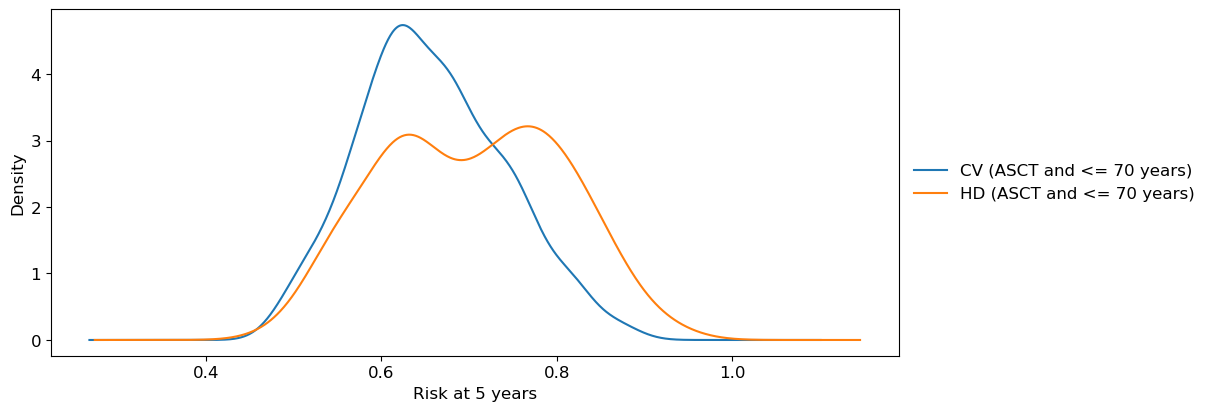

In [88]:
## Stratify further by age
# >70 with/without ASCT
# <=70 with/without ASCT

fig, (ax1) = plt.subplots(1, 1, sharex=True)

# SCT=1 and age
stratify_risk_groups_cv[(stratify_risk_groups_cv['SCT_first_line'] == 1) & (stratify_risk_groups_cv['age'] <=70)]['risk_pfs'].plot.kde(ax=ax1) ; 
stratify_risk_groups_cv[(stratify_risk_groups_hd['SCT_first_line'] == 1) & (stratify_risk_groups_cv['age'] <=70)]['risk_pfs'].plot.kde(ax=ax1) ; 

ax1.legend(labels=['CV (ASCT and <= 70 years)', 'HD (ASCT and <= 70 years)'], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) ; 
ax1.set_xlabel('Risk at 5 years')

In [89]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S5d: Stratify by ISS'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S5d: Stratify by ISS</strong></h1>

In [90]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.constrained_layout.use' : True
         }
pylab.rcParams.update(params)

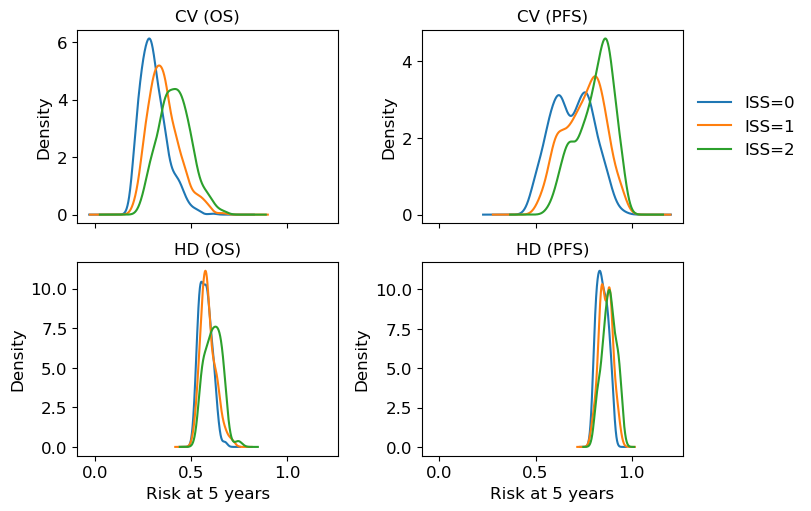

In [91]:
fig, axs = plt.subplots(2,2, sharex=True)

# os
ax1, ax2, ax3, ax4 = axs.flatten()
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 0]['risk_os'].plot.kde(ax=ax1) ; 
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 1]['risk_os'].plot.kde(ax=ax1) ; 
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 2]['risk_os'].plot.kde(ax=ax1) ; 

stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 0]['risk_os'].plot.kde(ax=ax3) ; 
stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 1]['risk_os'].plot.kde(ax=ax3) ; 
stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 2]['risk_os'].plot.kde(ax=ax3) ; 

ax1.set_title('CV (OS)') ; 
ax3.set_title('HD (OS)') ; ax3.set_xlabel('Risk at 5 years')

# pfs
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 0]['risk_pfs'].plot.kde(ax=ax2) ; 
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 1]['risk_pfs'].plot.kde(ax=ax2) ; 
stratify_risk_groups_cv[stratify_risk_groups_cv['ISS'] == 2]['risk_pfs'].plot.kde(ax=ax2) ; 

stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 0]['risk_pfs'].plot.kde(ax=ax4) ; 
stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 1]['risk_pfs'].plot.kde(ax=ax4) ; 
stratify_risk_groups_hd[stratify_risk_groups_hd['ISS'] == 2]['risk_pfs'].plot.kde(ax=ax4) ; 

ax2.legend(labels=['ISS=0', 'ISS=1', 'ISS=2'], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) ; 
ax2.set_title('CV (PFS)') ; 
ax4.set_title('HD (PFS)') ; ax4.set_xlabel('Risk at 5 years') ; # fig.suptitle('Stratify (PFS) by ISS')

In [92]:
Markdown('</font><h1><strong><font color={}>{}</strong></h1>'.format('#cf2518','Supplementary Figure S5e: Determine not significant features between two extreme model predicted risk groups for PFS'))

</font><h1><strong><font color=#cf2518>Supplementary Figure S5e: Determine not significant features between two extreme model predicted risk groups for PFS</strong></h1>

In [93]:
risk_gp_9_cv_cp = risk_gp_9_cv.copy()

# low and high risks and determine what features do not play a role
risk_gp_9_cv_cp['risk_code_low_high'] = np.select([(risk_gp_9_cv_cp['risk_pfs'] <= 0.5), 
                                                (risk_gp_9_cv_cp['risk_pfs'] >= 0.85),
                                               (risk_gp_9_cv_cp['risk_pfs'] > 0.5) &(risk_gp_9_cv_cp['risk_pfs'] < 0.85)], [0 , 1, 2])
risk_gp_9_cv_cp = risk_gp_9_cv_cp[risk_gp_9_cv_cp['risk_code_low_high'] != 2]

# look at extremes
df_feats_transf_cv_cp = df_feats_transf_cv_cp.loc[risk_gp_9_cv_cp['sample_id'].tolist()]

df_feats_transf_cv_cp.shape, risk_gp_9_cv_cp.shape

((424, 154), (424, 12))

In [94]:
print(df_feats_transf_cv_cp.shape, risk_gp_9_cv_cp.shape)

tupl_pval_feat = []

for feat in df_feats_transf_cv_cp.columns.tolist():
    if feat != 'age_group':
        _, p_val = scipy.stats.mstats.mannwhitneyu(risk_gp_9_cv_cp['risk_code_low_high'].tolist(), df_feats_transf_cv_cp[feat].tolist())
        tupl_pval_feat.append((feat, p_val))

not_signi = [item for item in tupl_pval_feat if item[1] > 0.05]
print(len(not_signi))
print(not_signi)

(424, 154) (424, 12)
1
[('CNV_Amp_1q21.3', 0.15411264285773477)]
